# 이중 플롯

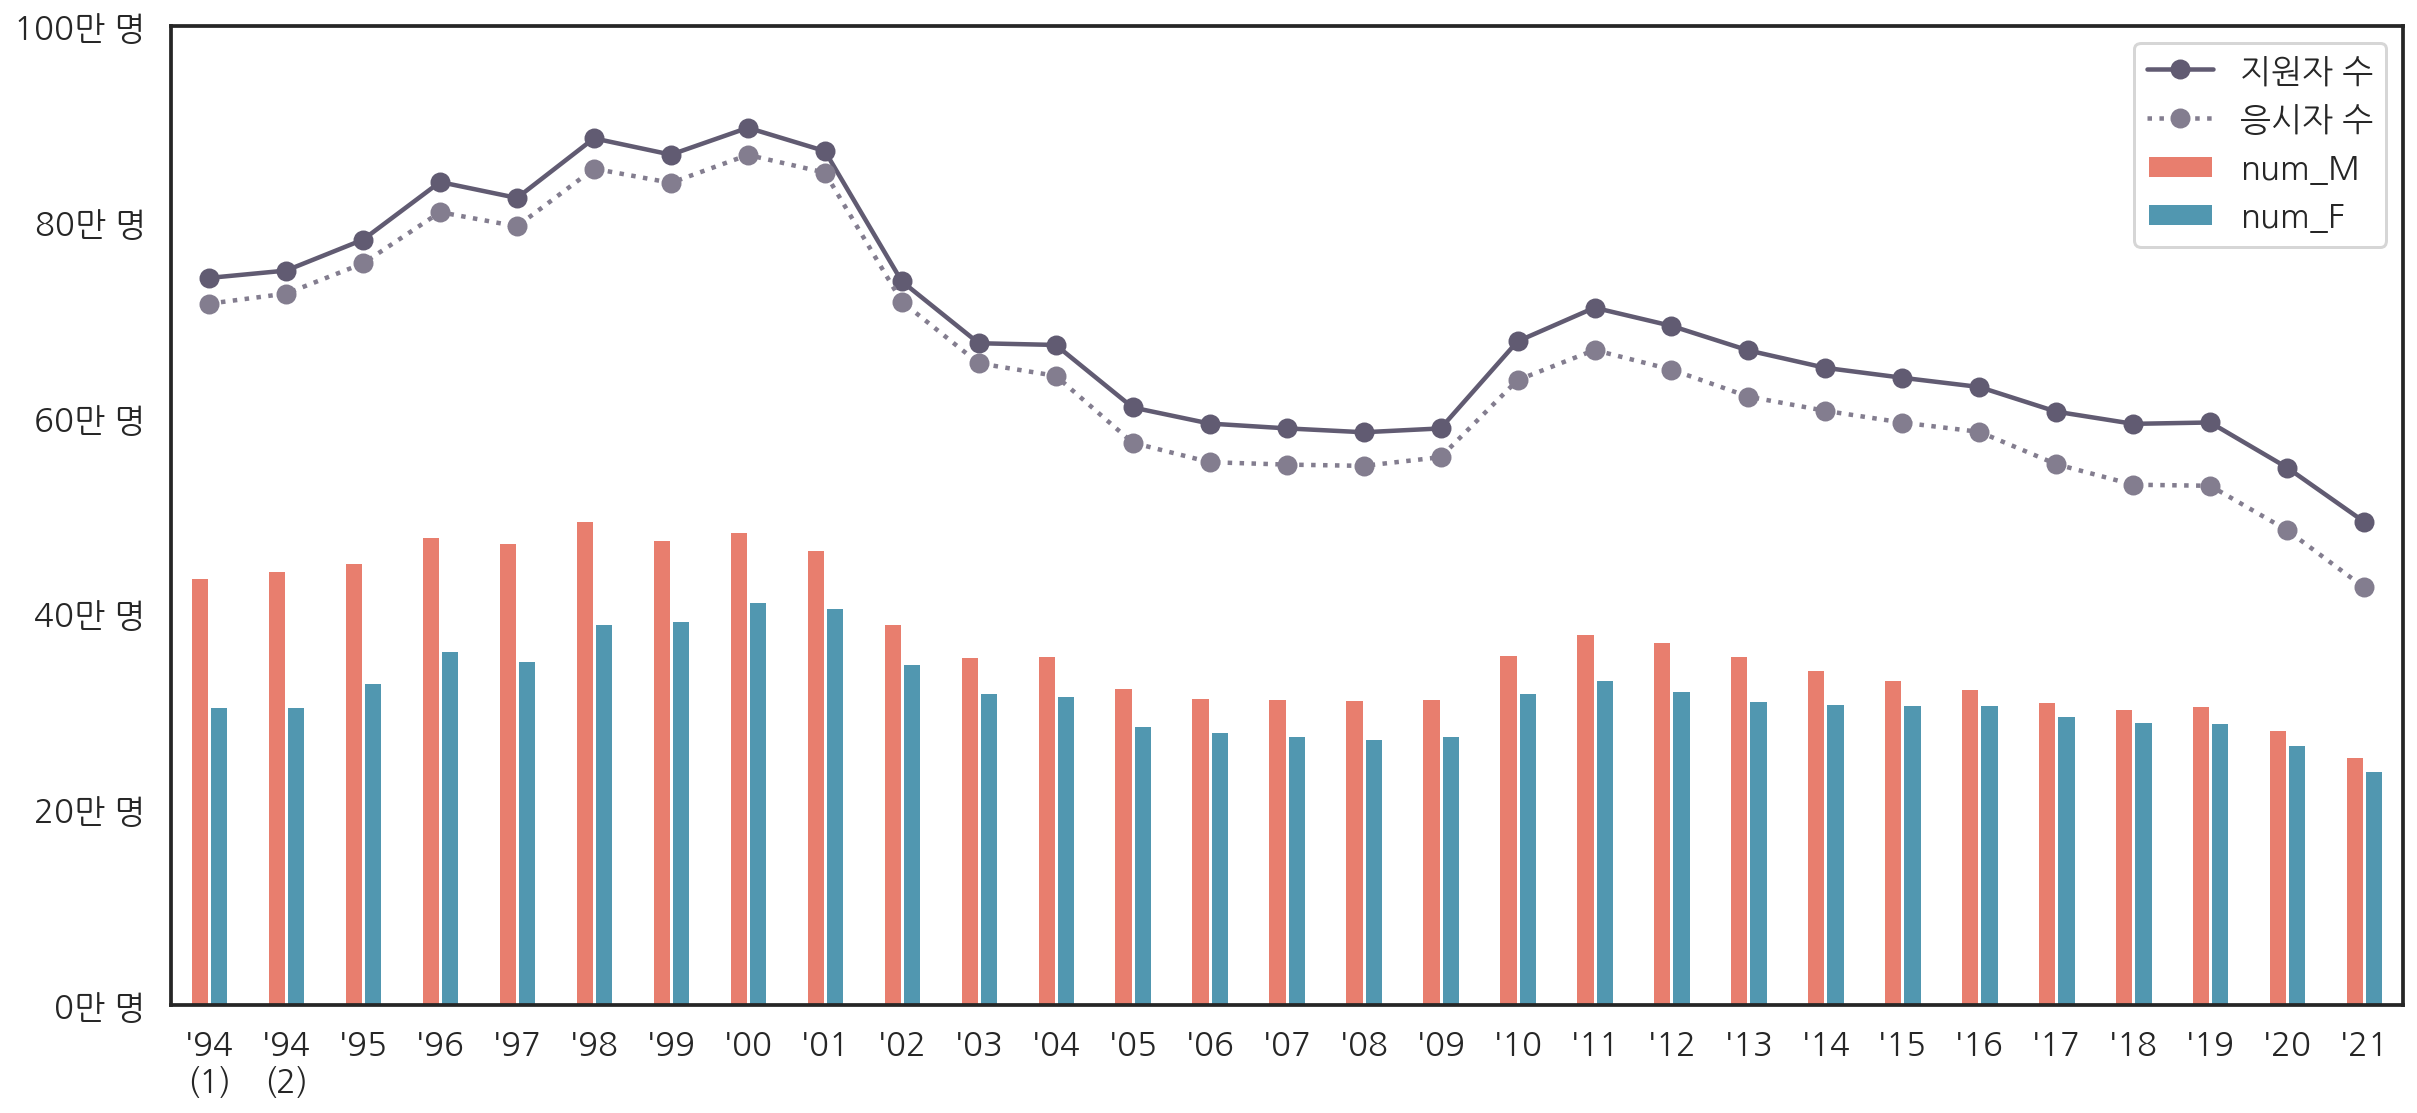

In [1]:
# 코렙 한글폰트 적용
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기


*   학년도 : year
*   지원자 수 : num_total
*   남성 지원자 수 : num_M
*   여성 지원자 수 : num_F
*   재학생 : cat_go3
*   졸업생 : cat_grad
*   검정 등 : cat_ged
*   응시자 수 : num_test
*   평균점수 (전체) : score_avg
*   평균점수 (남성) : score_avg_M
*   평균점수 (여성) : score_avg_F
*   평균점수 (재학생) : score_avg_go3
*   평균점수 (졸업생) : score_avg_grad
*   평균점수 (전체 상위 50%) : score_t50_avg
*   평균점수 (남성 상위 50%) : score_t50_avg_M
*   평균점수 (여성 상위 50%) : score_t50_avg_F
*   평균점수 (재학생 상위 50%) : score_t50_avg_go3
*   평균점수 (졸업생 상위 50%) : score_t50_avg_go3



In [3]:
import pandas as pd

df_sn = pd.read_csv("sn_apply.csv")
df_sn.head()

,year,num_total,num_M,num_F,cat_go3,cat_grad,cat_ged,num_test,score_avg,score_avg_M,score_avg_F,score_avg_go3,score_avg_grad,score_t50_avg,score_t50_avg_M,score_t50_avg_F,score_t50_avg_go3,score_t50_avg_grad
0,1994,742668,437465,305203,521806,213459,7403,716326,49.2,49.7,48.5,49.0,49.6,61.7,62.6,60.2,NaN,NaN
1,1994,750181,444612,305569,496617,243826,9738,726634,44.5,44.6,44.3,45.2,43.2,54.8,55.7,53.5,NaN,NaN
2,1995,781749,452360,329389,477960,261492,42297,757488,49.7,49.7,49.8,51.2,47.8,63.2,63.3,60.7,NaN,NaN
3,1996,840661,478707,361954,526833,300482,13346,809867,46.1,46.0,46.1,47.0,44.4,57.7,58.6,56.6,NaN,NaN
4,1997,824374,472527,351847,545023,268044,11307,795338,42.7,42.4,43.1,43.6,40.8,54.1,55.1,52.9,NaN,NaN


In [4]:
# 점수 데이터에 결측치 
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                29 non-null     int64  
 1   num_total           29 non-null     int64  
 2   num_M               29 non-null     int64  
 3   num_F               29 non-null     int64  
 4   cat_go3             29 non-null     int64  
 5   cat_grad            29 non-null     int64  
 6   cat_ged             29 non-null     int64  
 7   num_test            29 non-null     int64  
 8   score_avg           9 non-null      float64
 9   score_avg_M         9 non-null      float64
 10  score_avg_F         9 non-null      float64
 11  score_avg_go3       9 non-null      float64
 12  score_avg_grad      9 non-null      float64
 13  score_t50_avg       9 non-null      float64
 14  score_t50_avg_M     9 non-null      float64
 15  score_t50_avg_F     9 non-null      float64
 16  score_t50_

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 사전 준비
sns.set_context("talk")
sns.set_style("white")

# 한글 사용 준비
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## 그림 색 불러오기

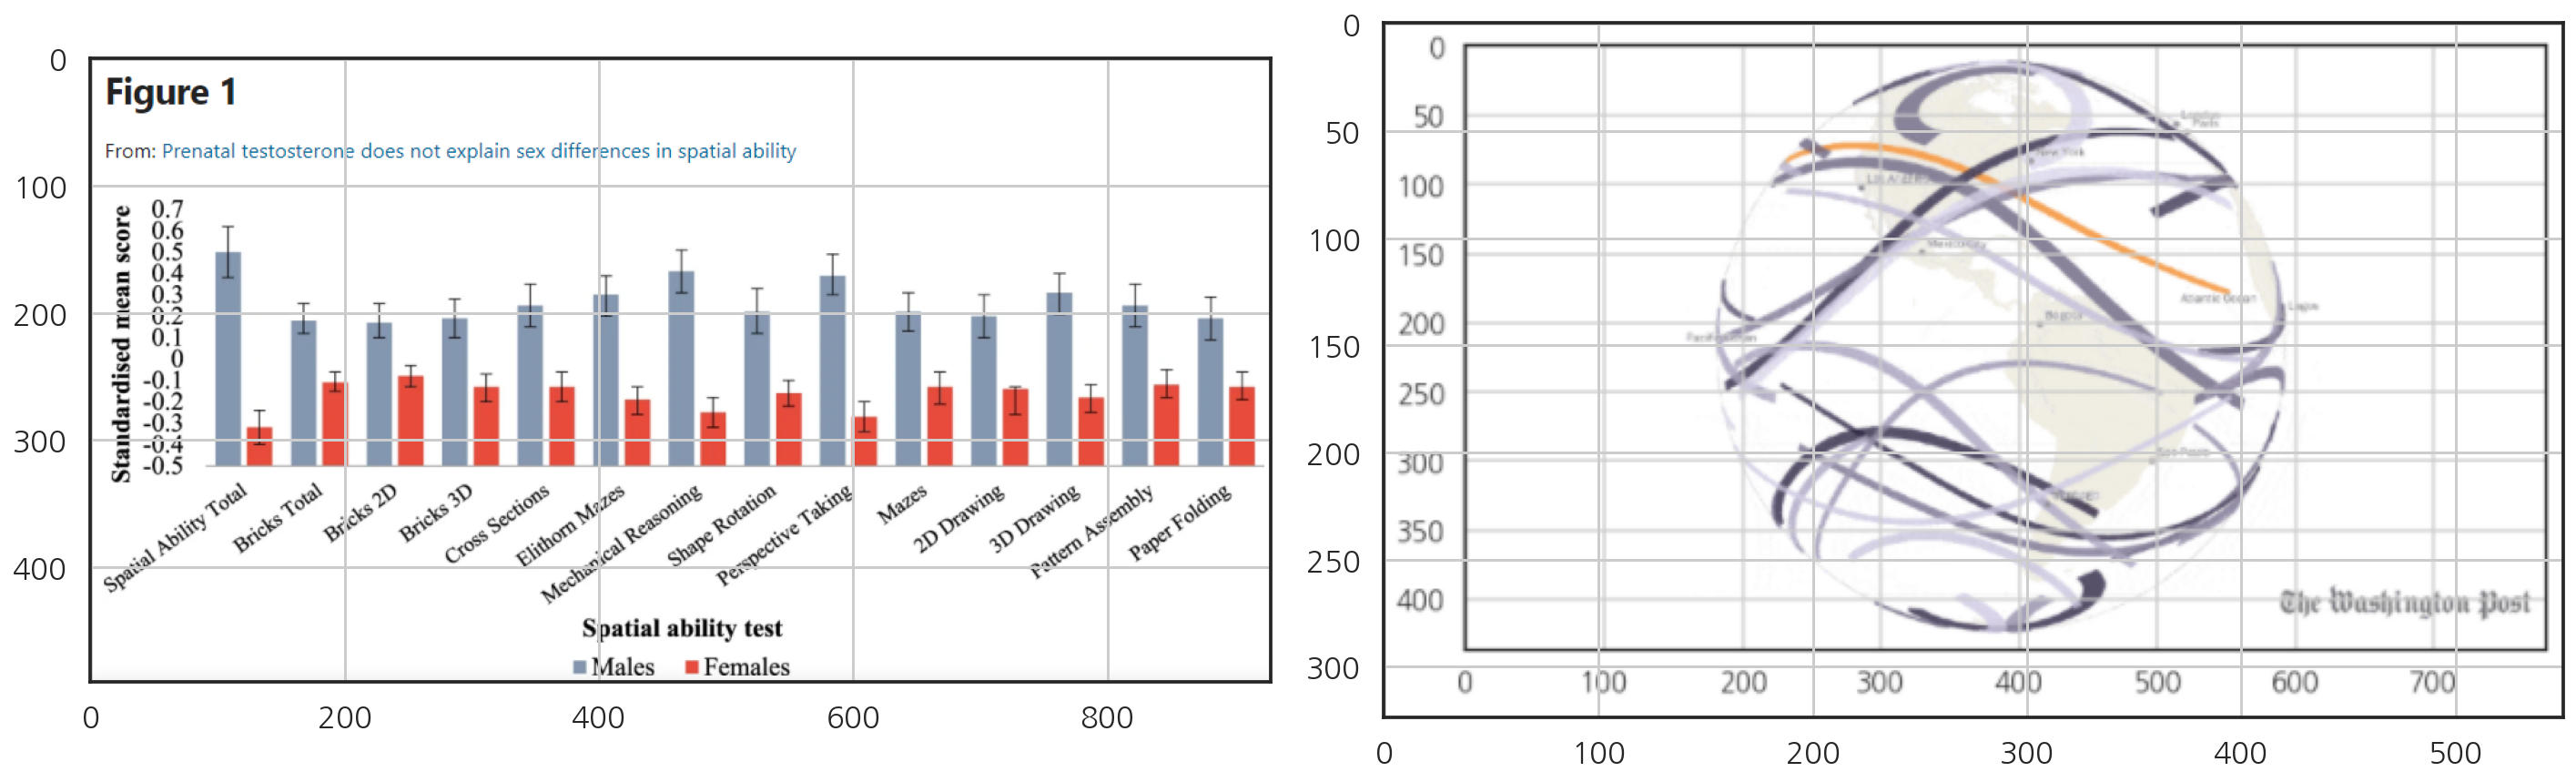

In [8]:
# 이미지 가져오기
ex0 = plt.imread("/content/제목 없음1.png")    # 논문 그림
ex1 = plt.imread("/content/제목 없음.png")    # 구글링 그림

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (ax, ex) in enumerate(zip(axs, [ex0, ex1])):
    ax.imshow(ex)
    ax.grid()

fig.tight_layout()

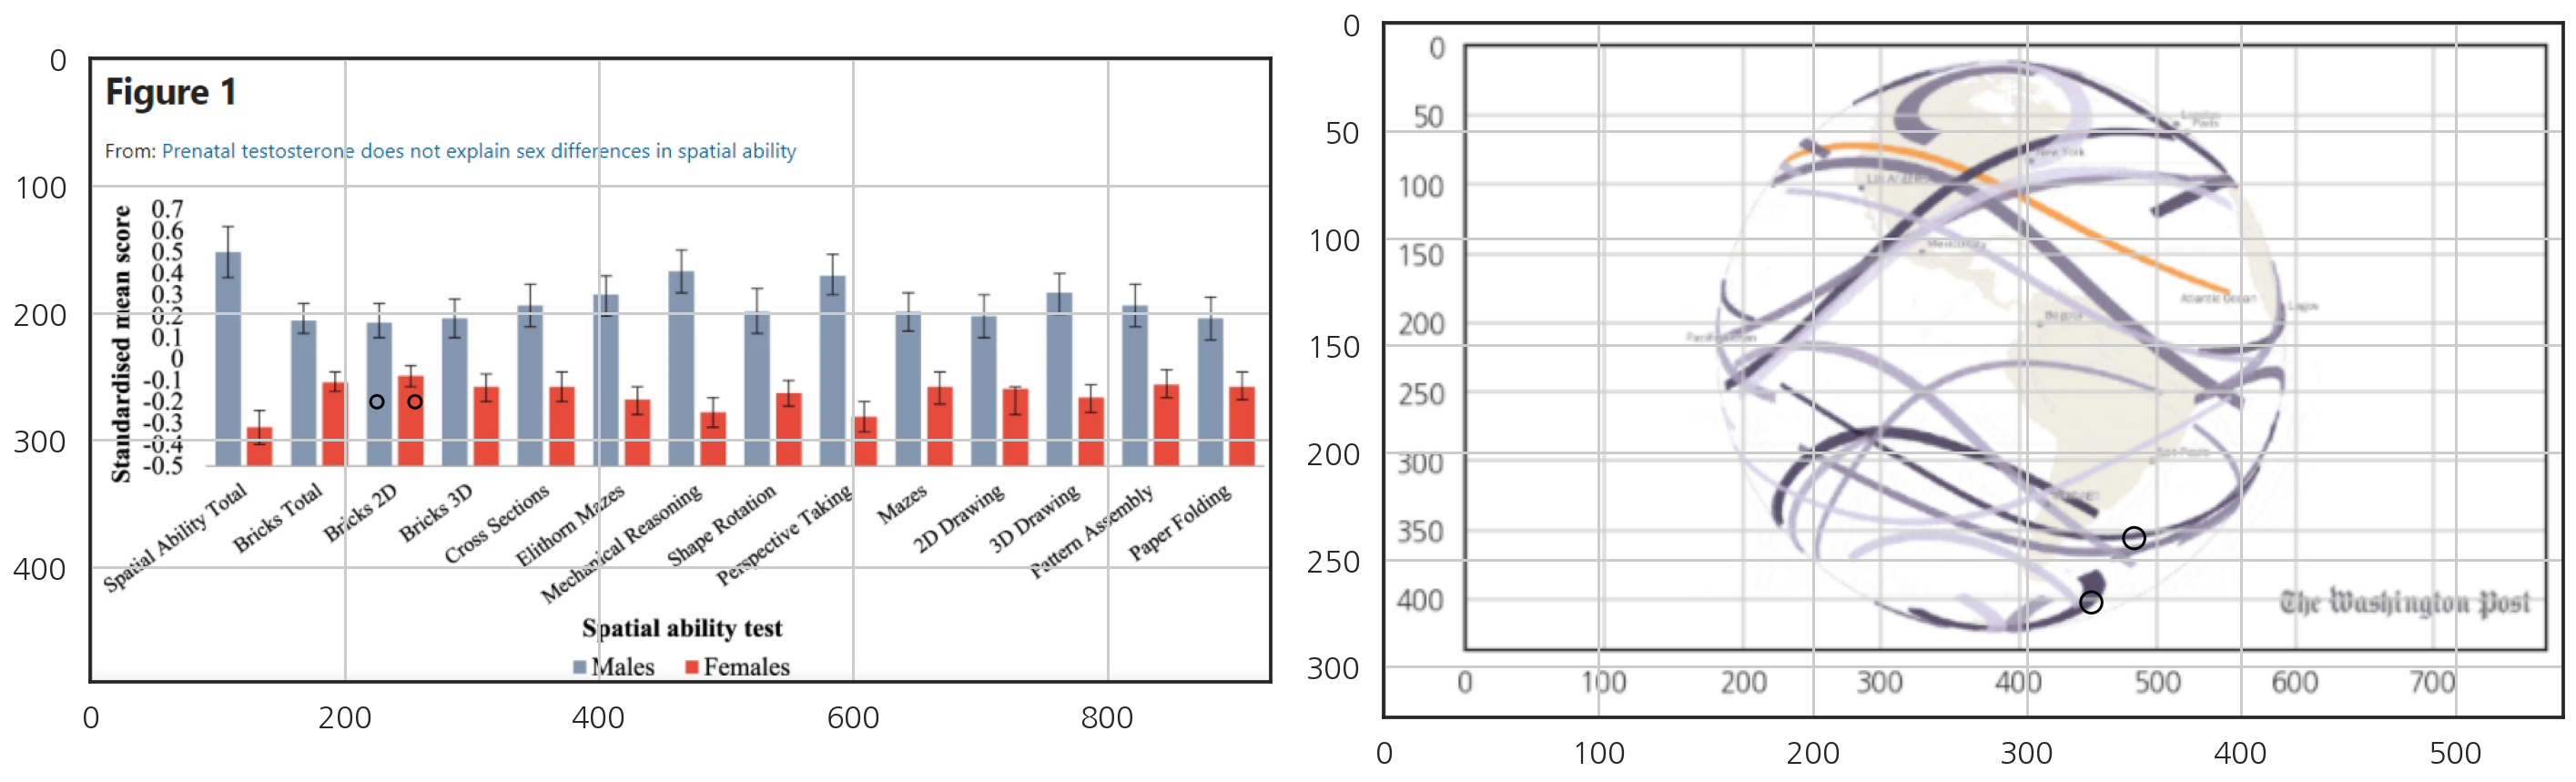

In [19]:
from matplotlib.patches import Circle


circle_F = Circle((225, 270), radius=5, edgecolor="k", facecolor="none") # 여성
circle_M = Circle((255, 270), radius=5, edgecolor="k", facecolor="none") # 남성
circle_total = Circle((330, 270), radius=5, edgecolor="k", facecolor="none") # 지원자
circle_test = Circle((350, 240), radius=5, edgecolor="k", facecolor="none")  # 응시자

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (ax, ex) in enumerate(zip(axs, [ex0, ex1])):
    ax.imshow(ex)
    ax.grid()

# 원 그리기    
axs[0].add_patch(circle_F)
axs[0].add_patch(circle_M)
axs[1].add_patch(circle_total)
axs[1].add_patch(circle_test)

fig.tight_layout()

In [20]:
color_M = ex0[150, 235]
color_M

array([1., 1., 1.], dtype=float32)

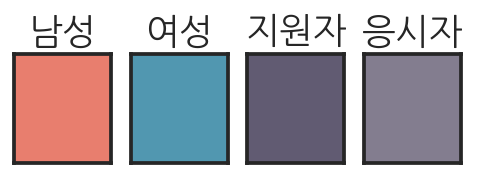

In [21]:
color_F = ex0[270, 225][:3] + np.array([-0.2, 0, 0])
color_M = ex0[270, 255][:3] + np.array([0, 0.2, 0.2])
color_total = ex1[270, 330][:3]
color_test = ex1[240, 350][:3]

fig, axs = plt.subplots(ncols=4, figsize=(4, 1))
for ax, c, t in zip(axs, 
                    [color_M, color_F, color_total, color_test],
                    ["남성", "여성", "지원자", "응시자"]):
    ax.set_facecolor(c)
    ax.set_title(t)
    ax.set_xticks([])
    ax.set_yticks([])


## 지원자와 응시자

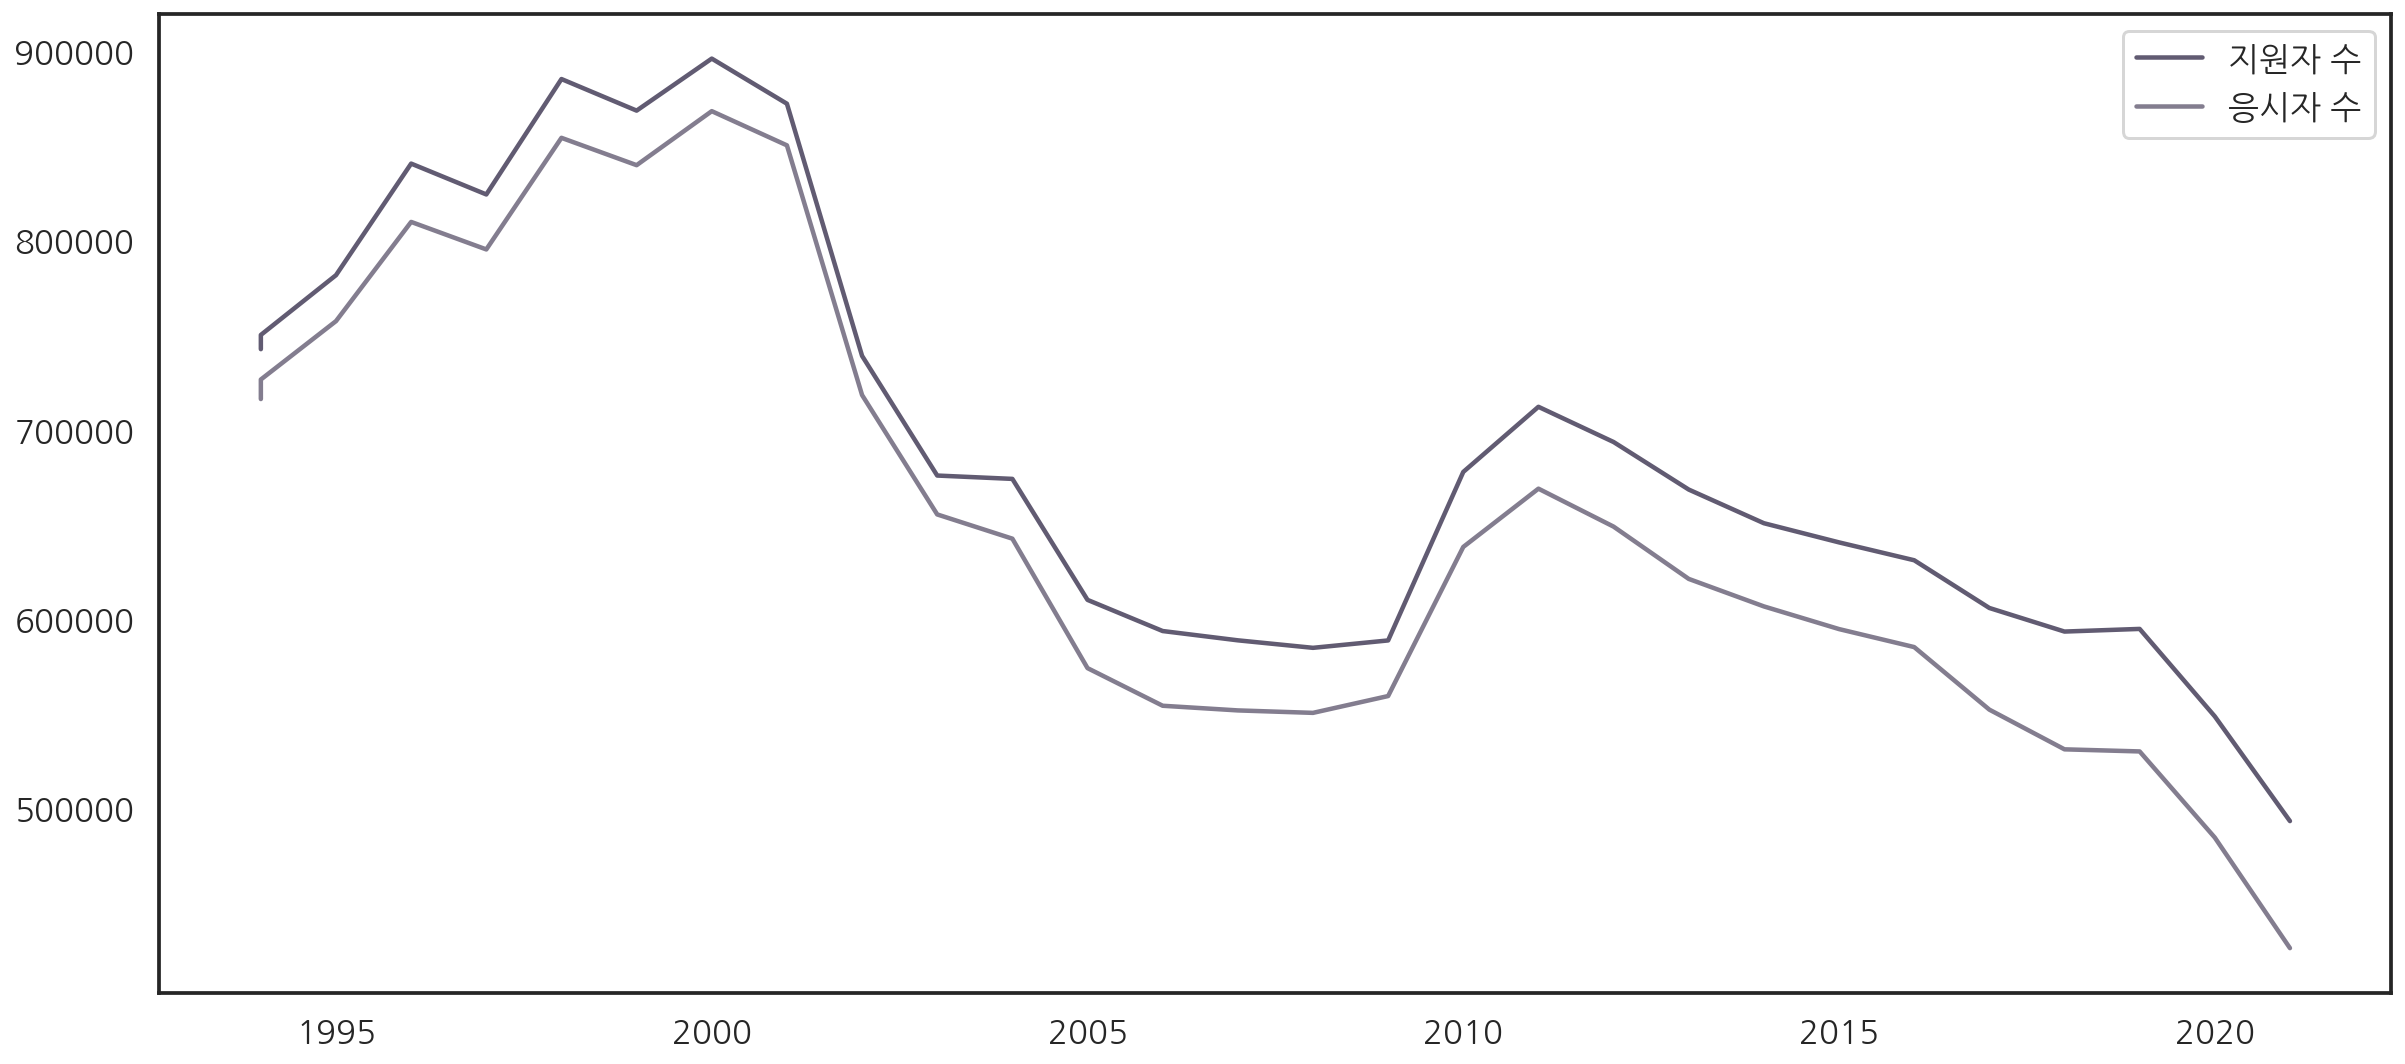

In [22]:
fig, ax = plt.subplots(figsize=(20, 9))

# 지원자 수 
ax.plot(df_sn["year"], df_sn["num_total"], color=color_total, label="지원자 수")

# 응시자 수
ax.plot(df_sn["year"], df_sn["num_test"], color=color_test, label="응시자 수")

# 범례 추가
ax.legend()

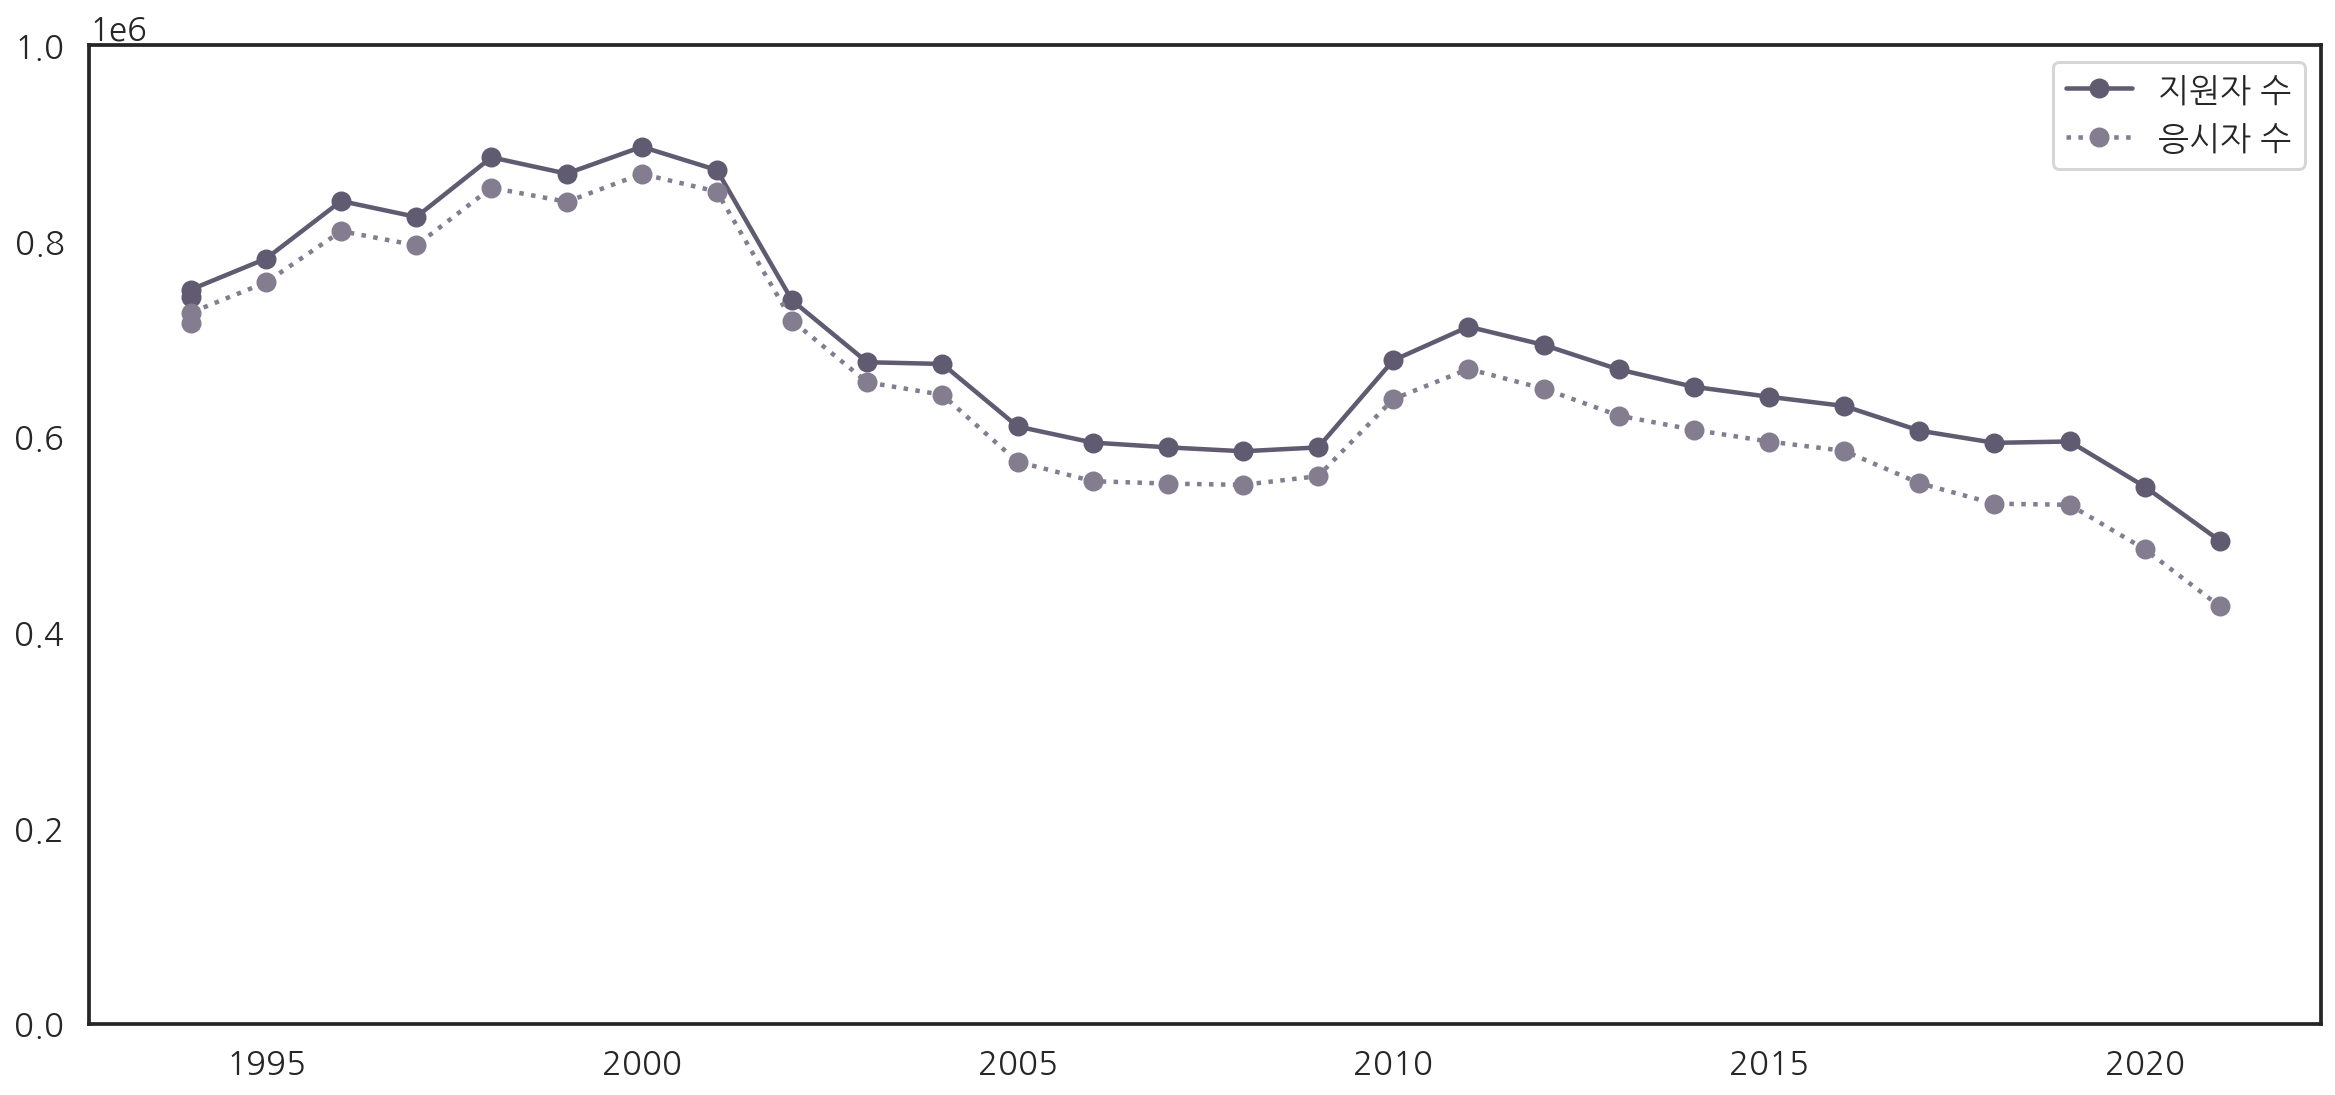

In [23]:
fig, ax = plt.subplots(figsize=(20, 9))

# 마커 추가, 선 모양 변경
ax.plot(df_sn["year"], df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["year"], df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# y축 범위 변경
ax.set_ylim(0, 1000000)

# 범례 추가
ax.legend()

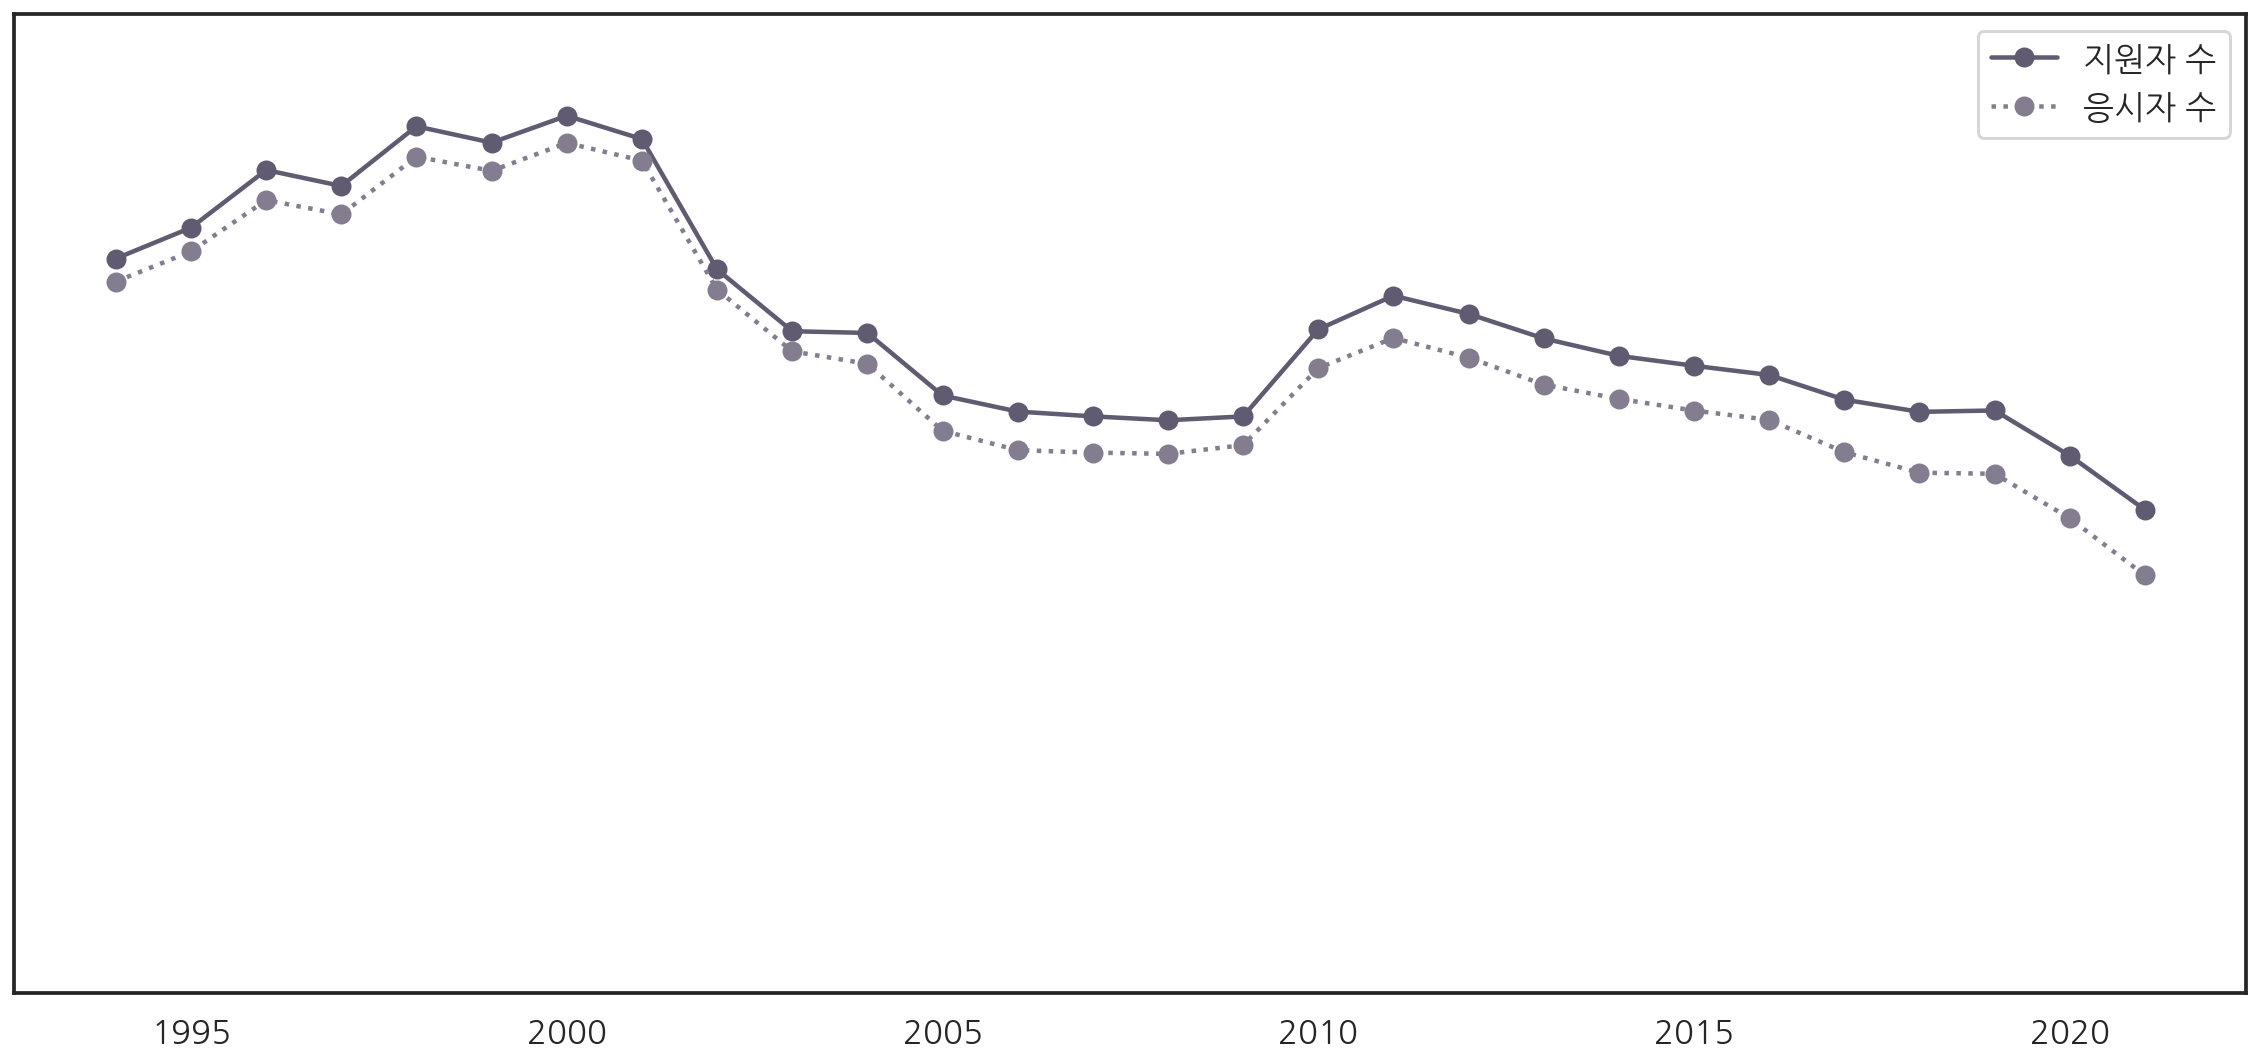

In [24]:
fig, ax = plt.subplots(figsize=(20, 9))

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([y for y in yticklabels]) # yticklabels 사용

ax.legend()

In [25]:
print(yticklabels)

<a list of 6 Text major ticklabel objects>


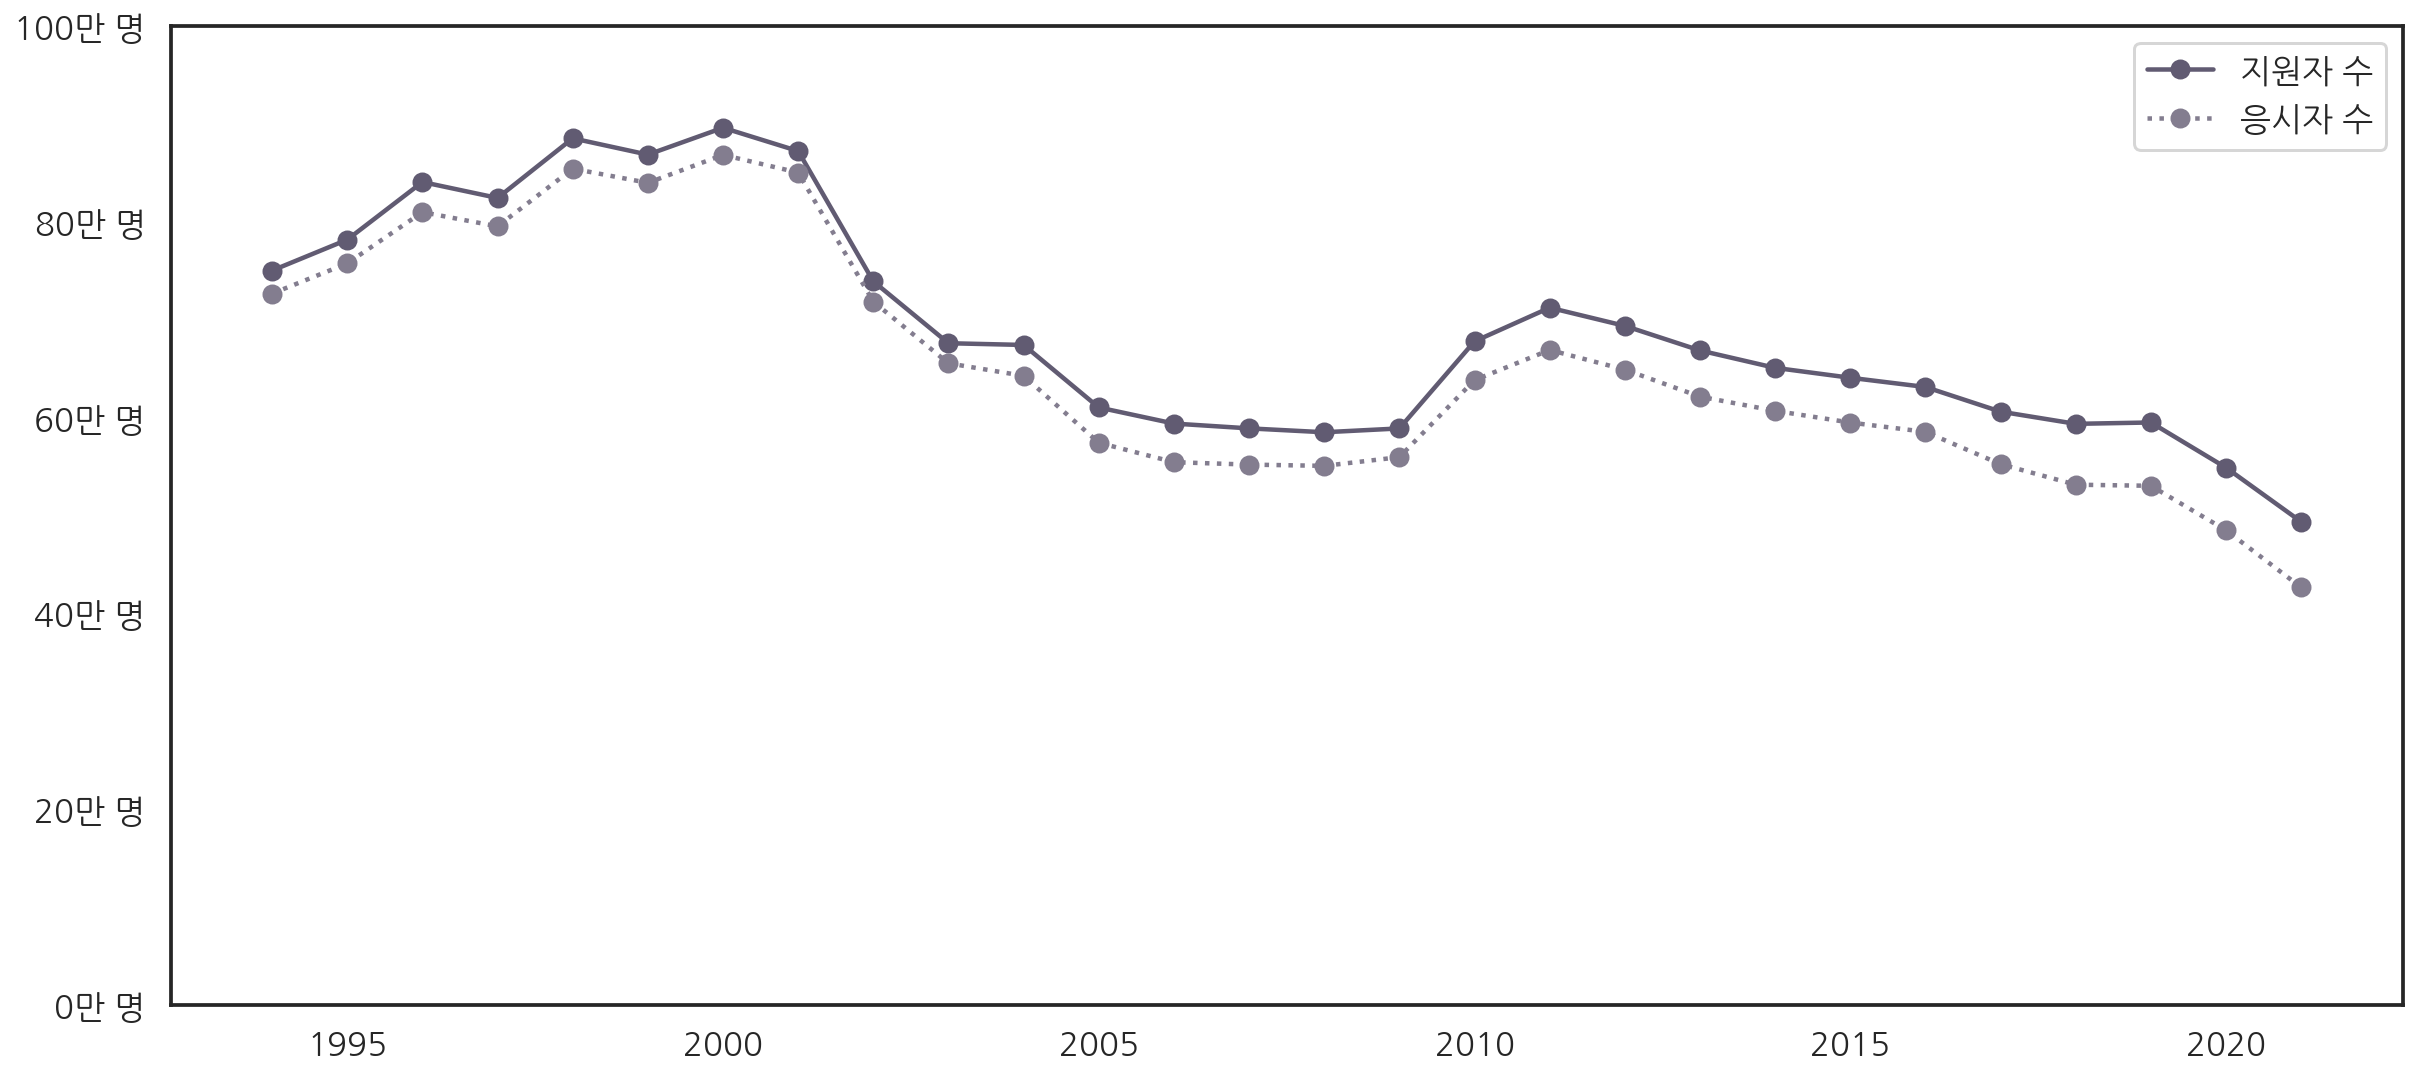

In [26]:
# step 3. 데이터 표현 바꾸기 (2)-성공

fig, ax = plt.subplots(figsize=(20, 9))

# 데이터 범위 수정
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

# ylim 범위 수정
ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks]) # yticks 사용

ax.legend()

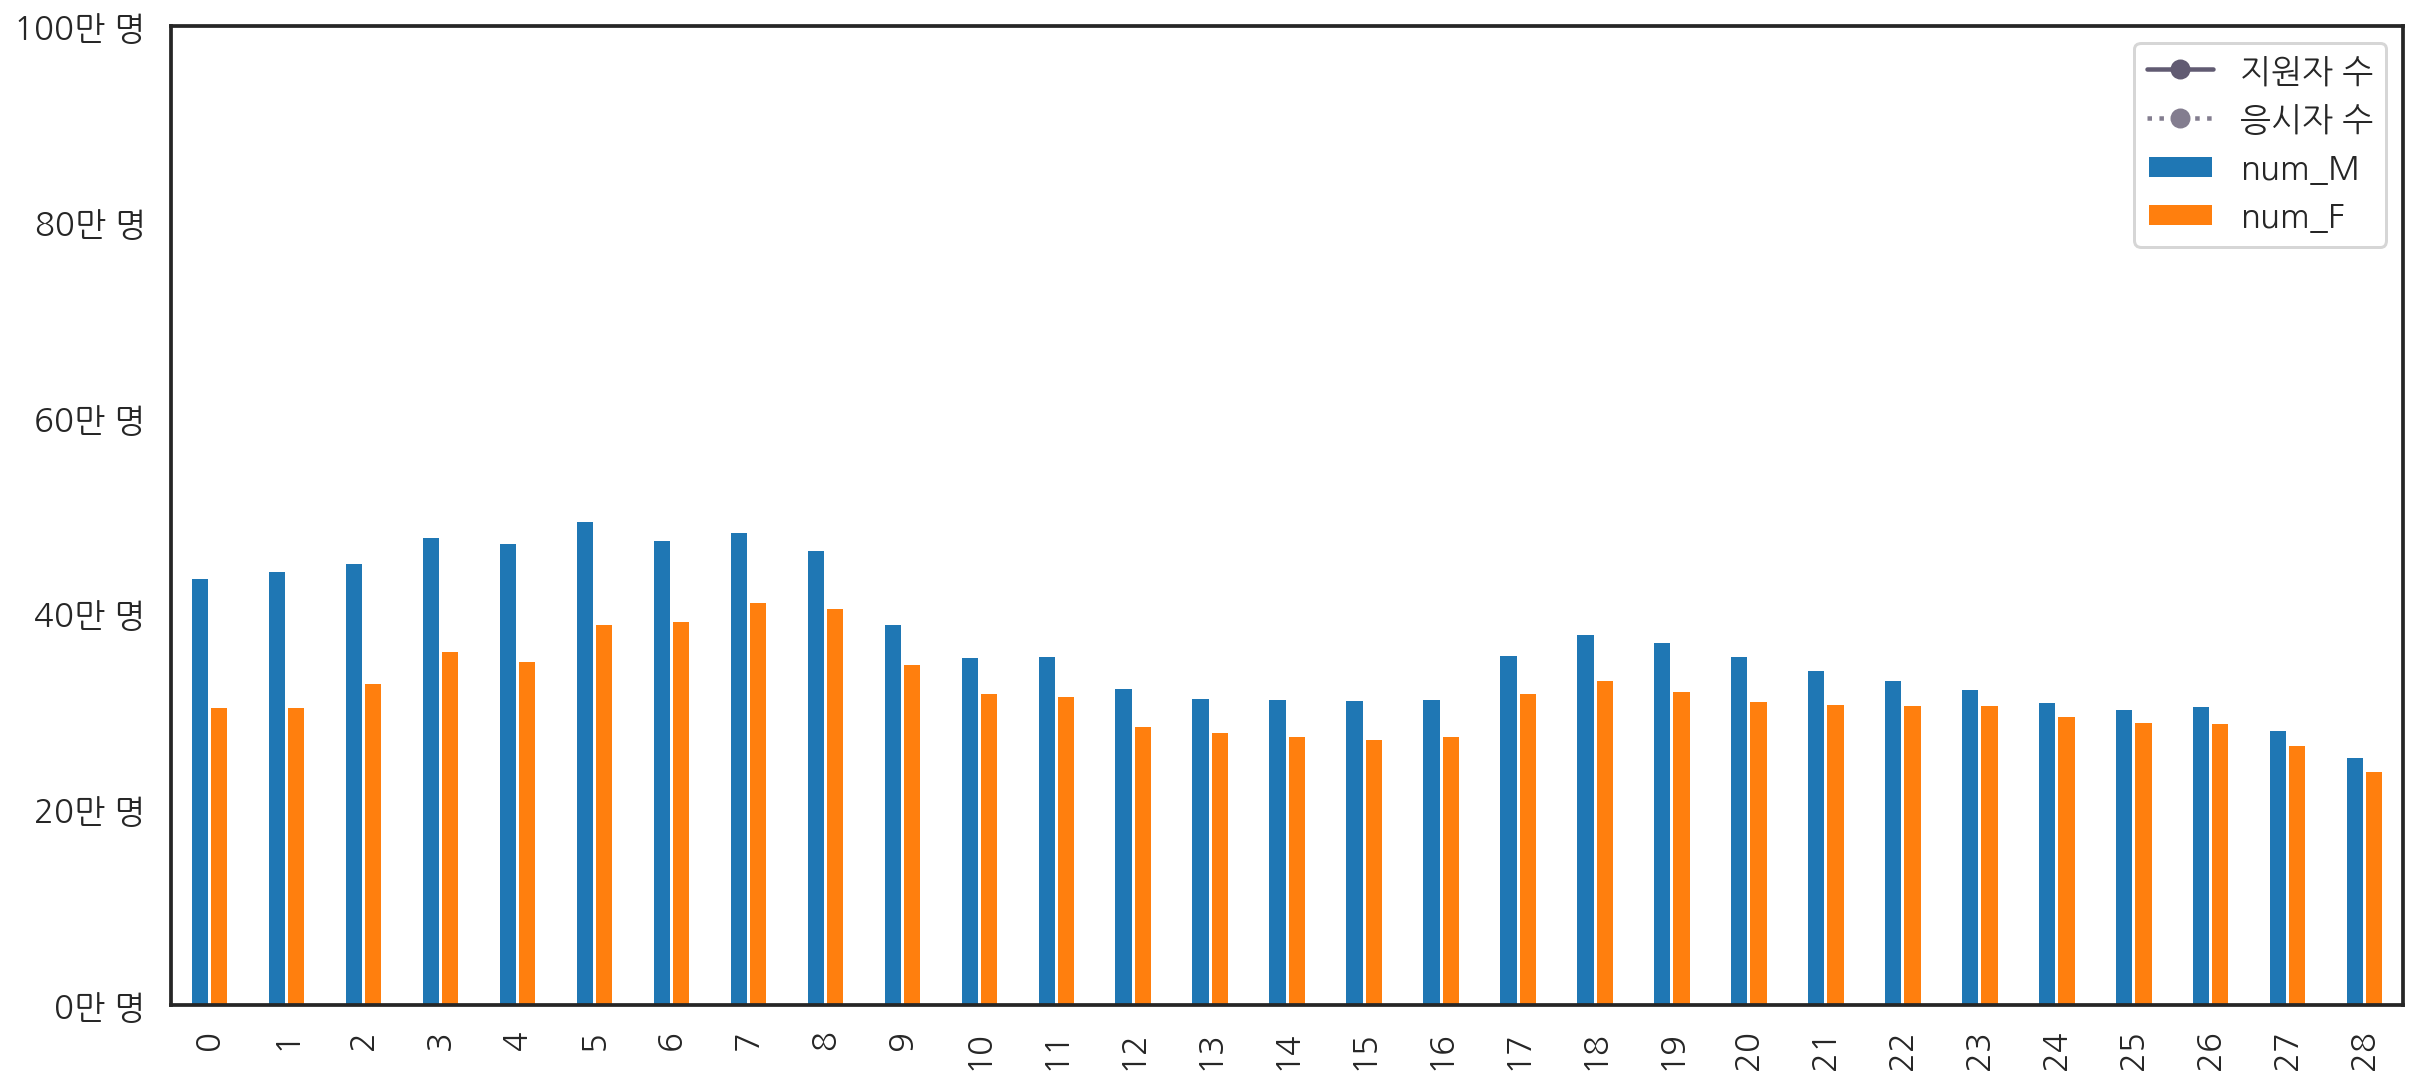

In [27]:
fig, ax = plt.subplots(figsize=(20, 9))

# pandas bar plot
ax = df_sn[["num_M", "num_F"]].plot.bar(ax=ax)

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

(0.0, 1000000.0)

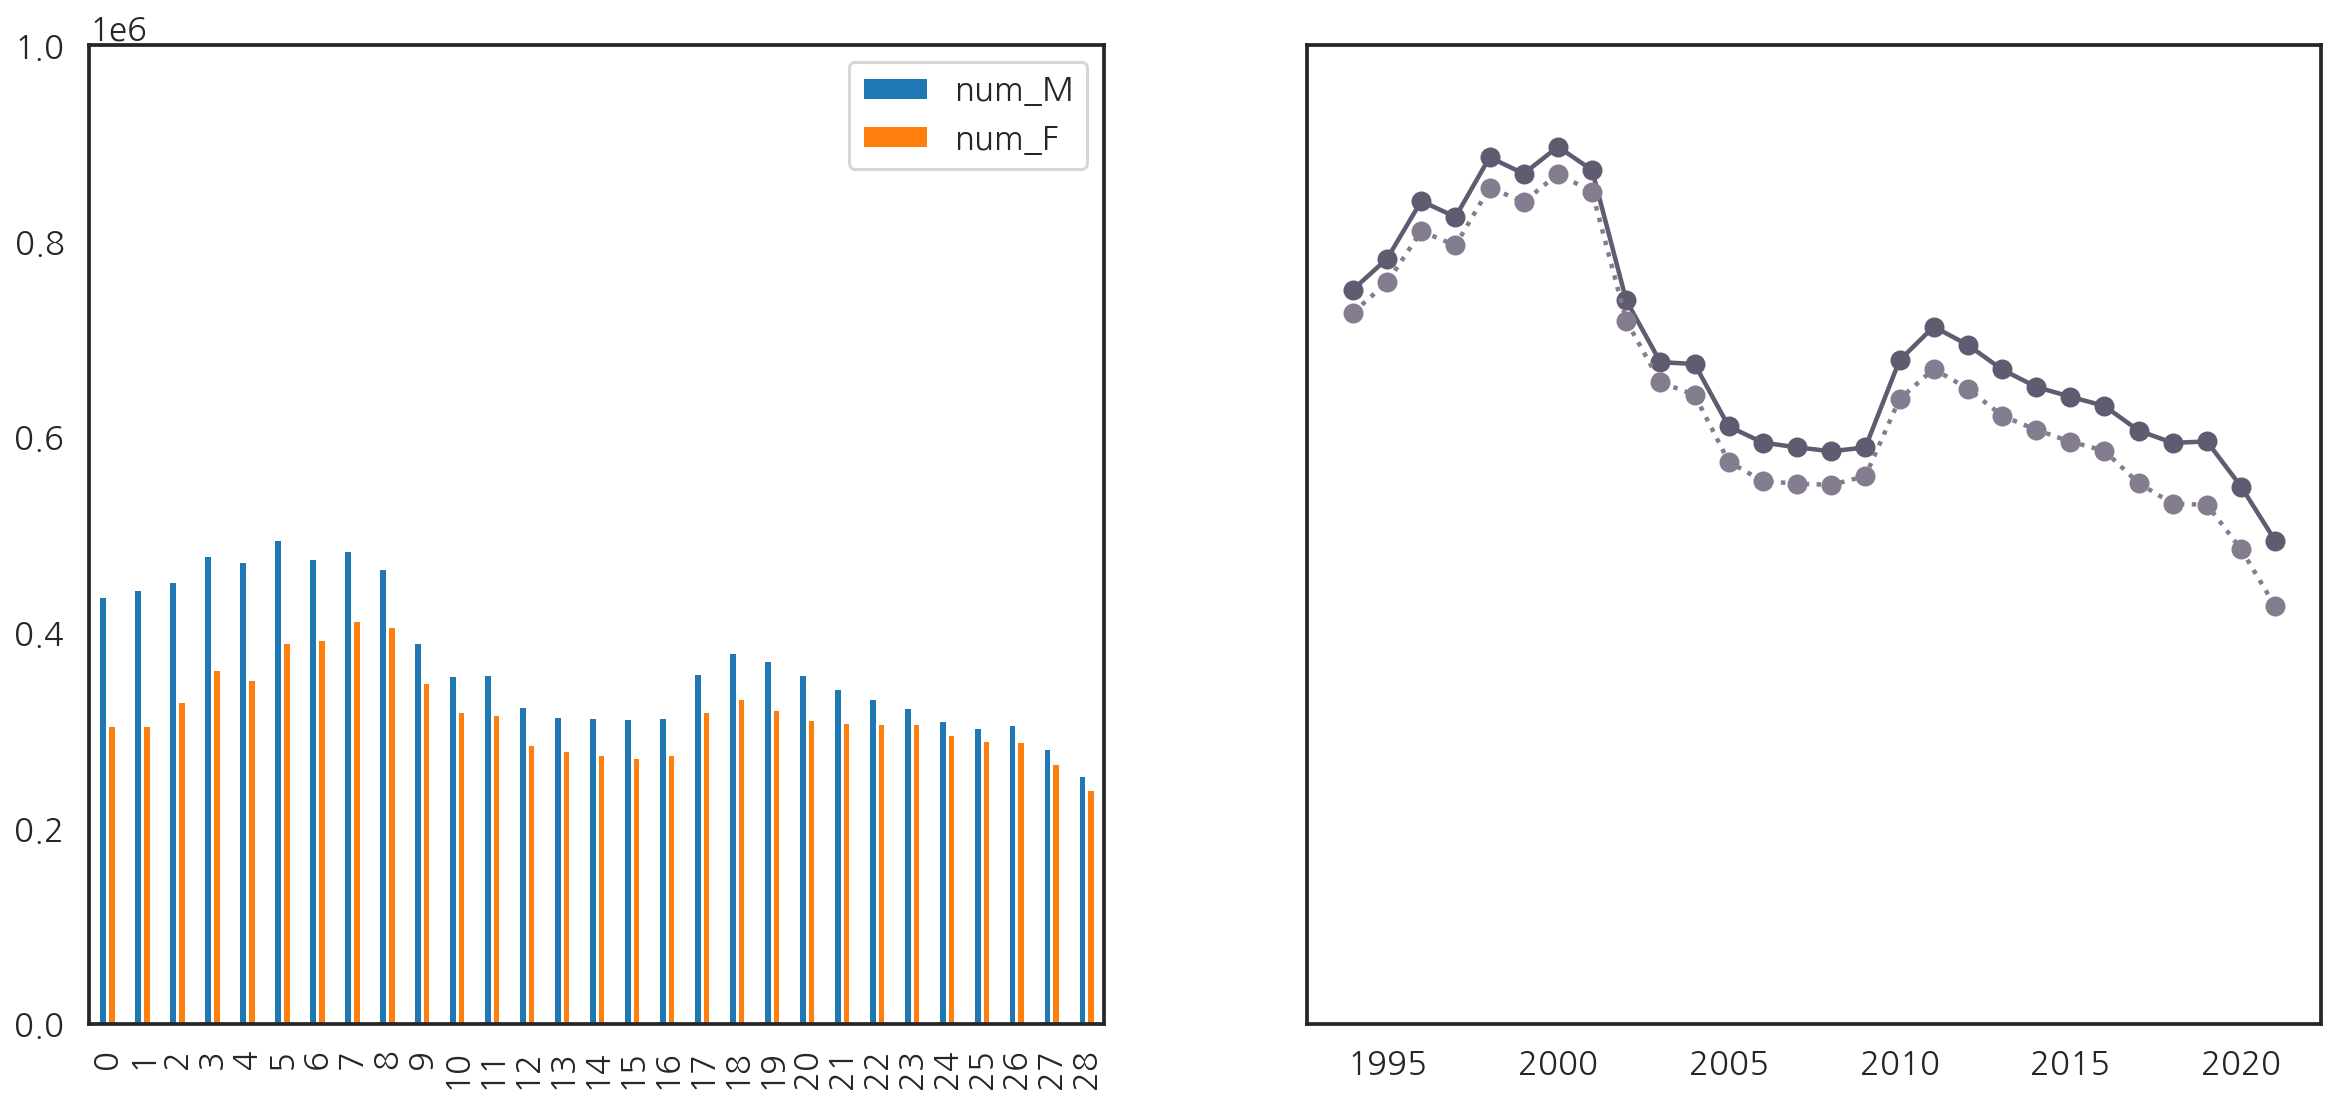

In [28]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

df_sn[["num_M", "num_F"]].plot.bar(ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)


In [29]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


(0.0, 1000000.0)

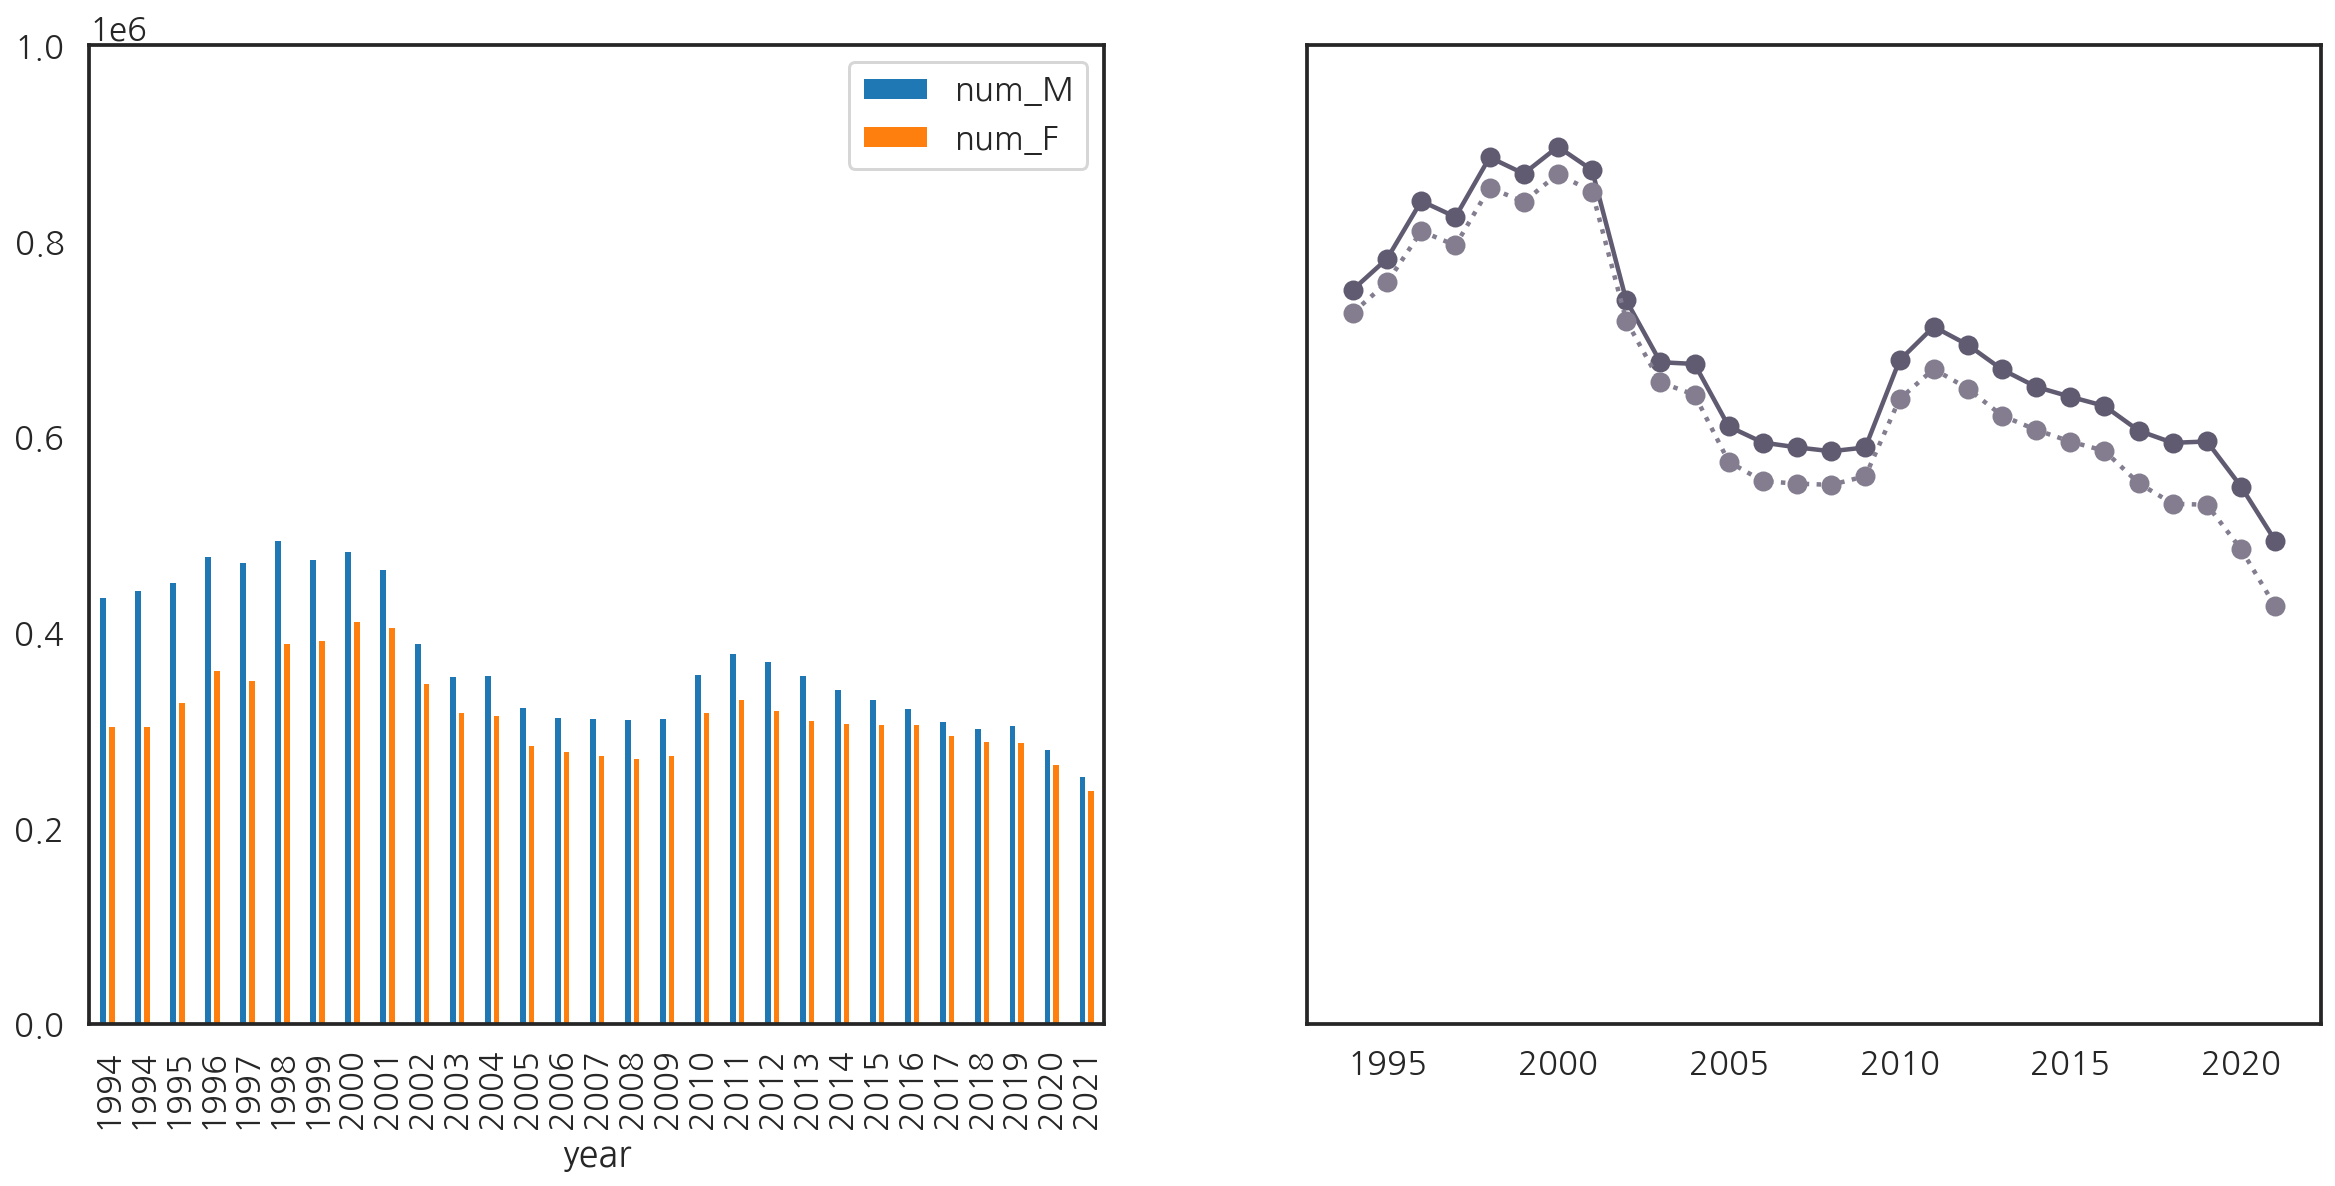

In [30]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

# x 데이터 추가
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

In [31]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


(0.0, 1000000.0)

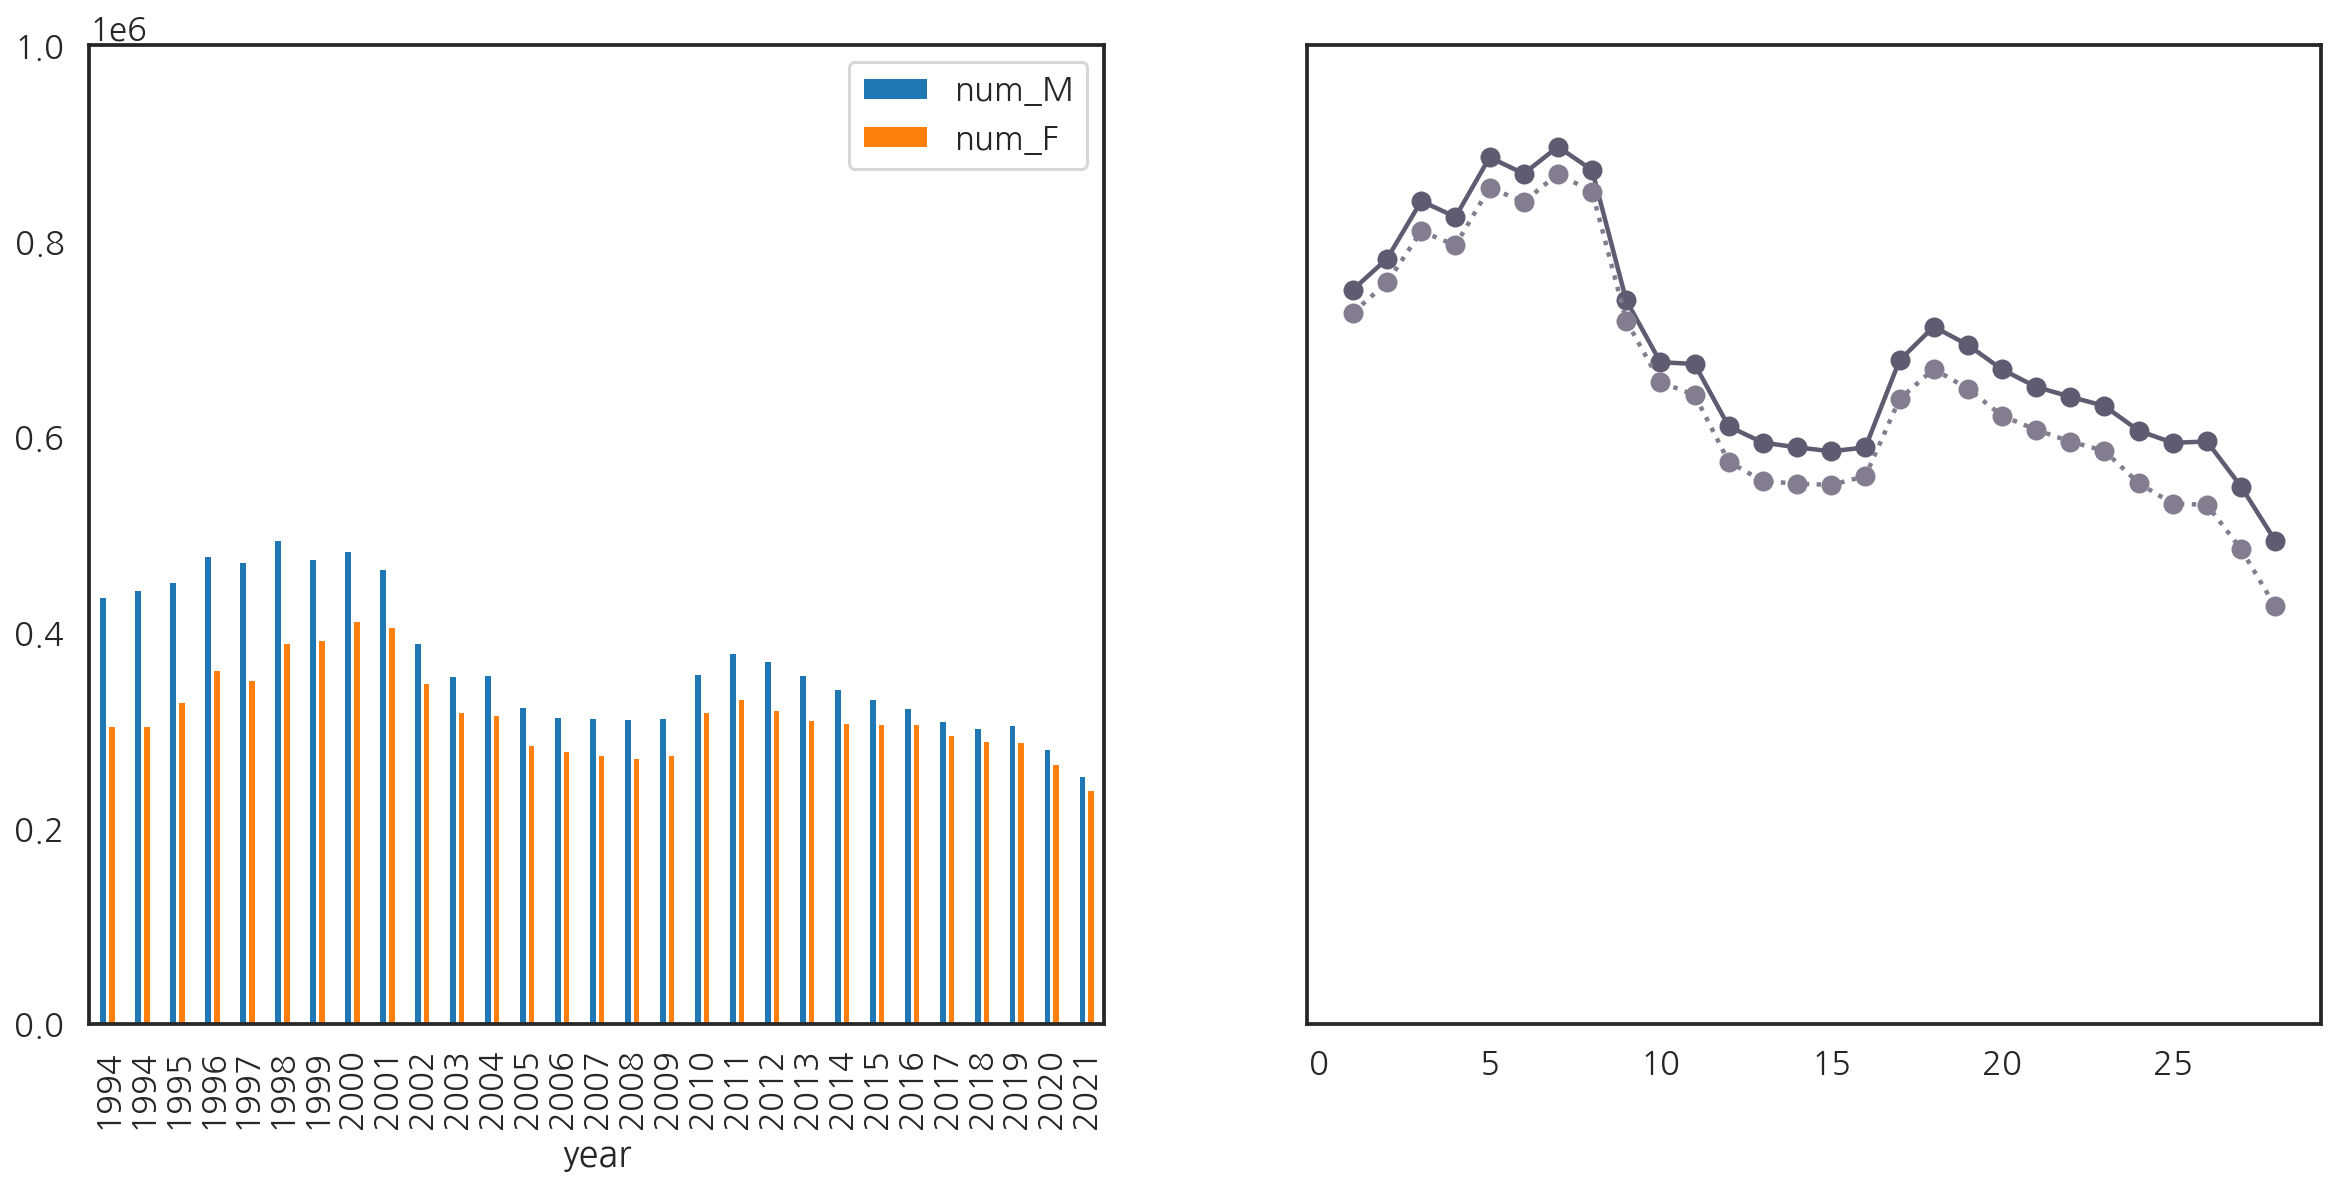

In [32]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

# x 데이터 추가
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0], zorder=0)

# x 데이터 제거
axs[1].plot(df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

In [33]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [-5.  0.  5. 10. 15. 20. 25. 30.]


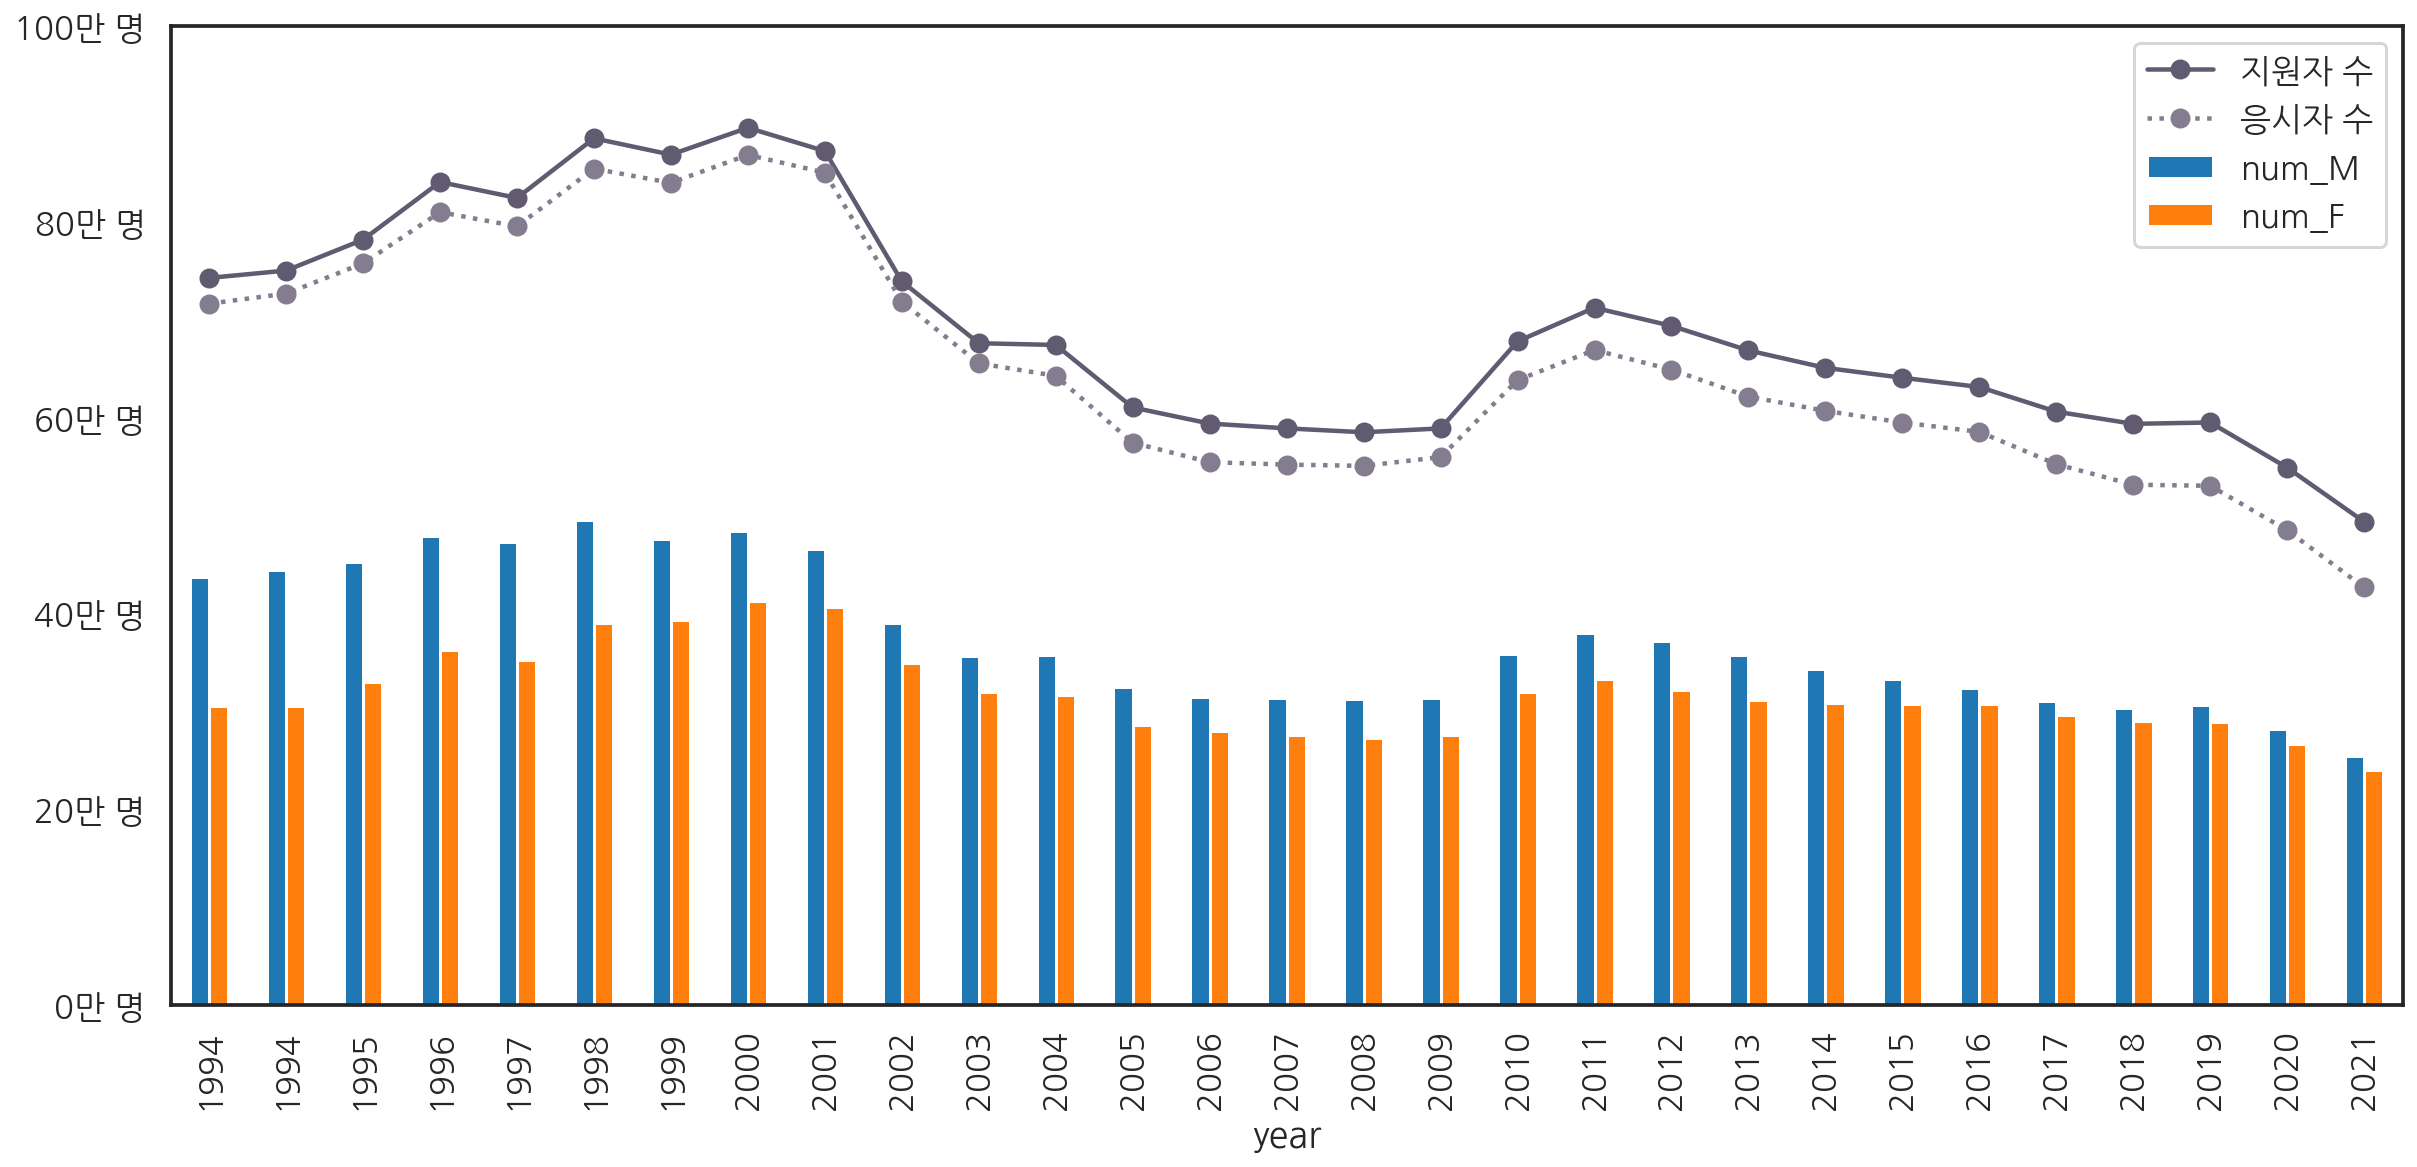

In [34]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax)

# x 데이터 범위 수정
ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

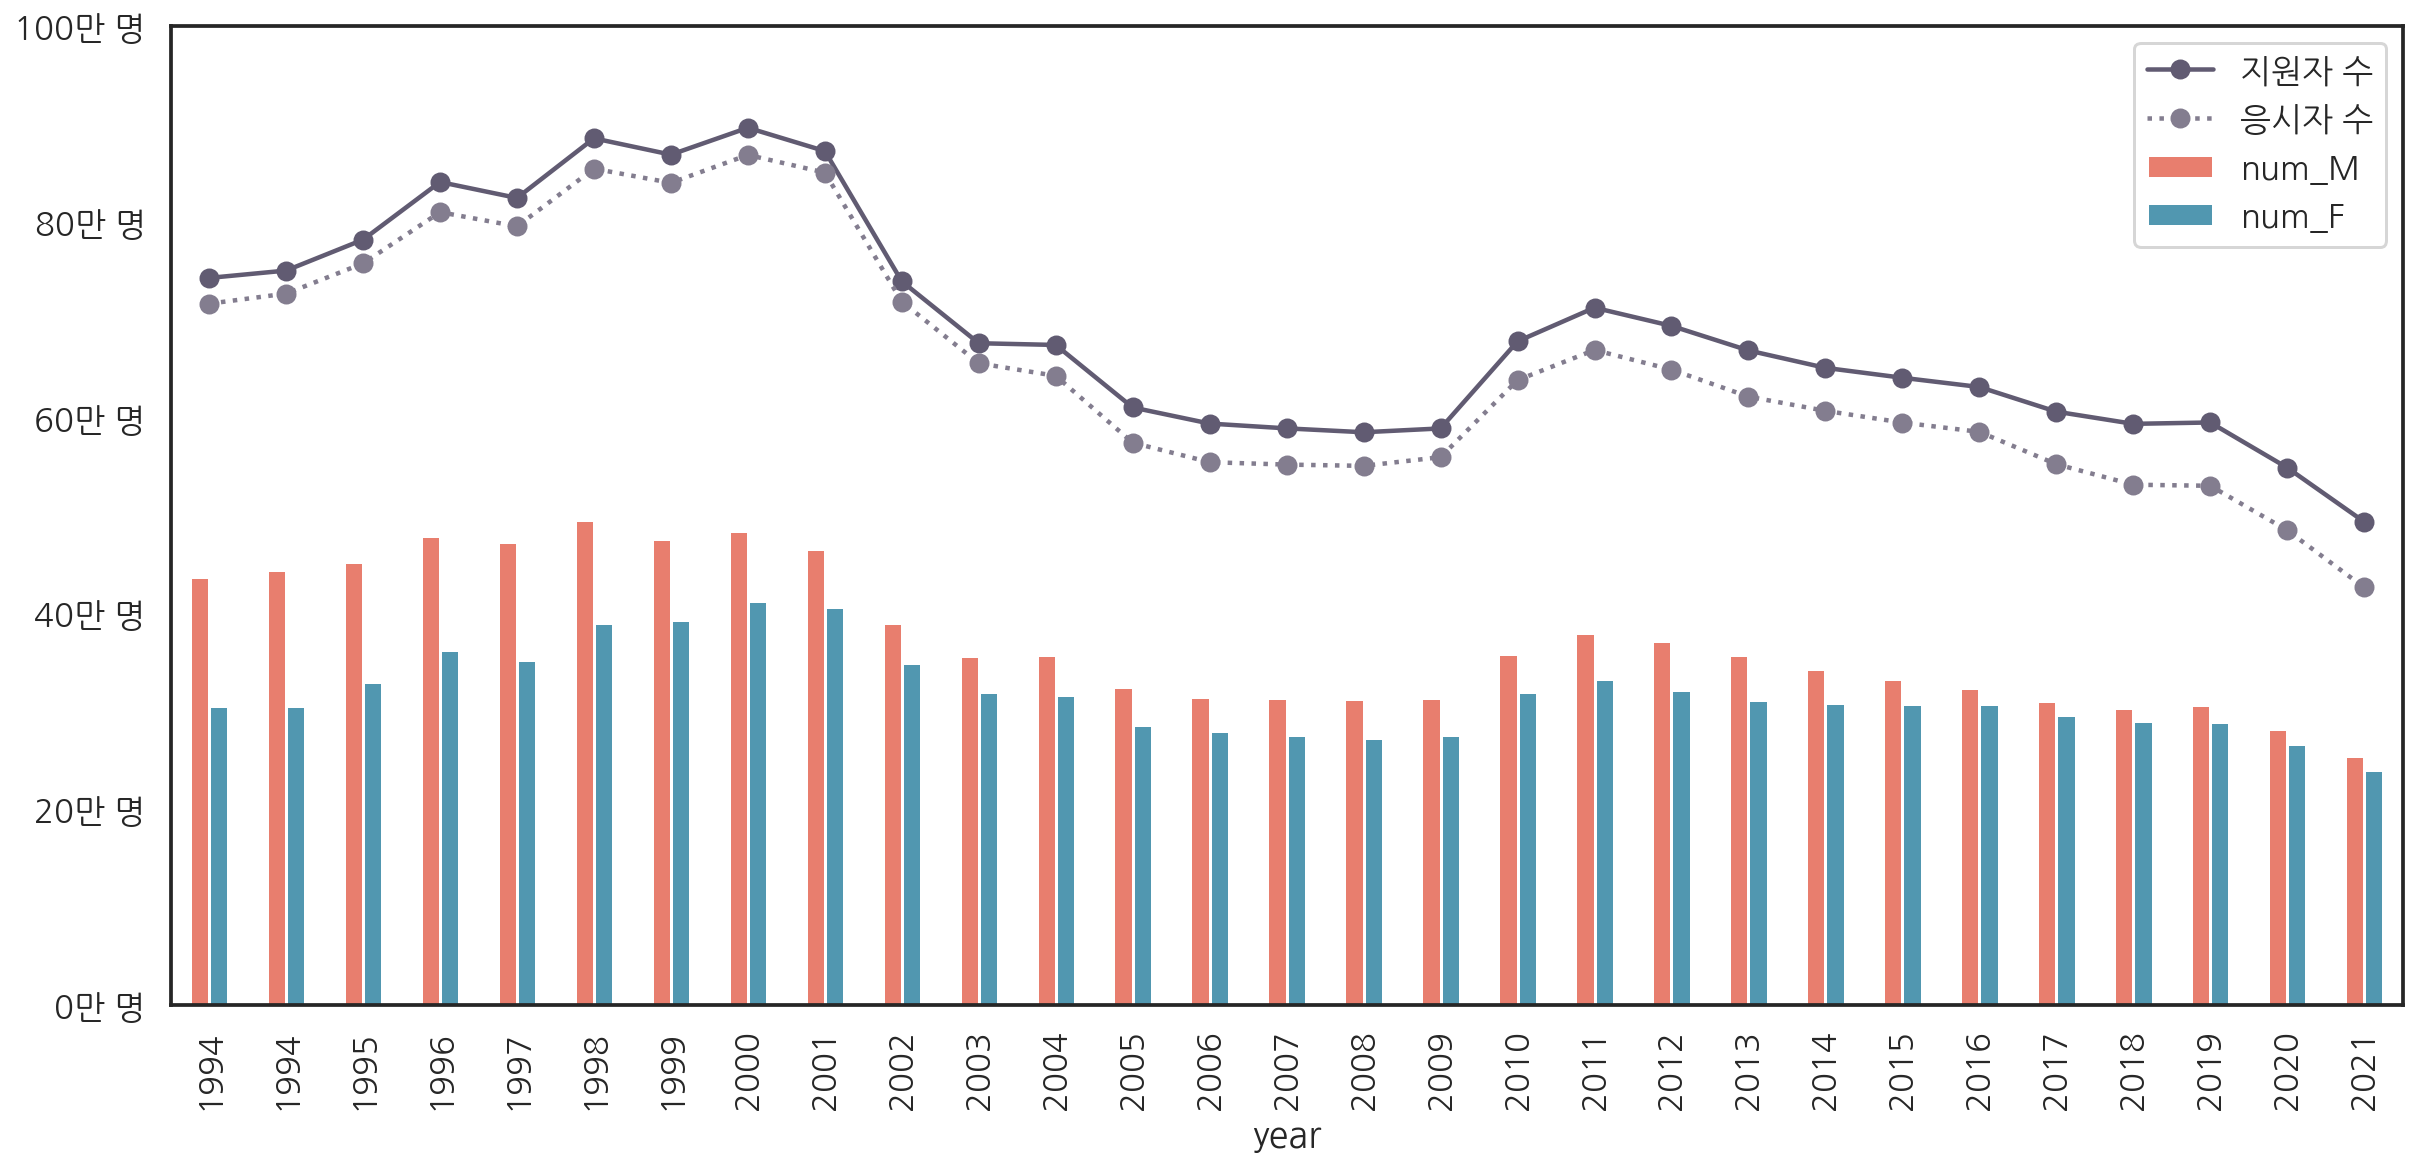

In [35]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

# bar color 반영
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

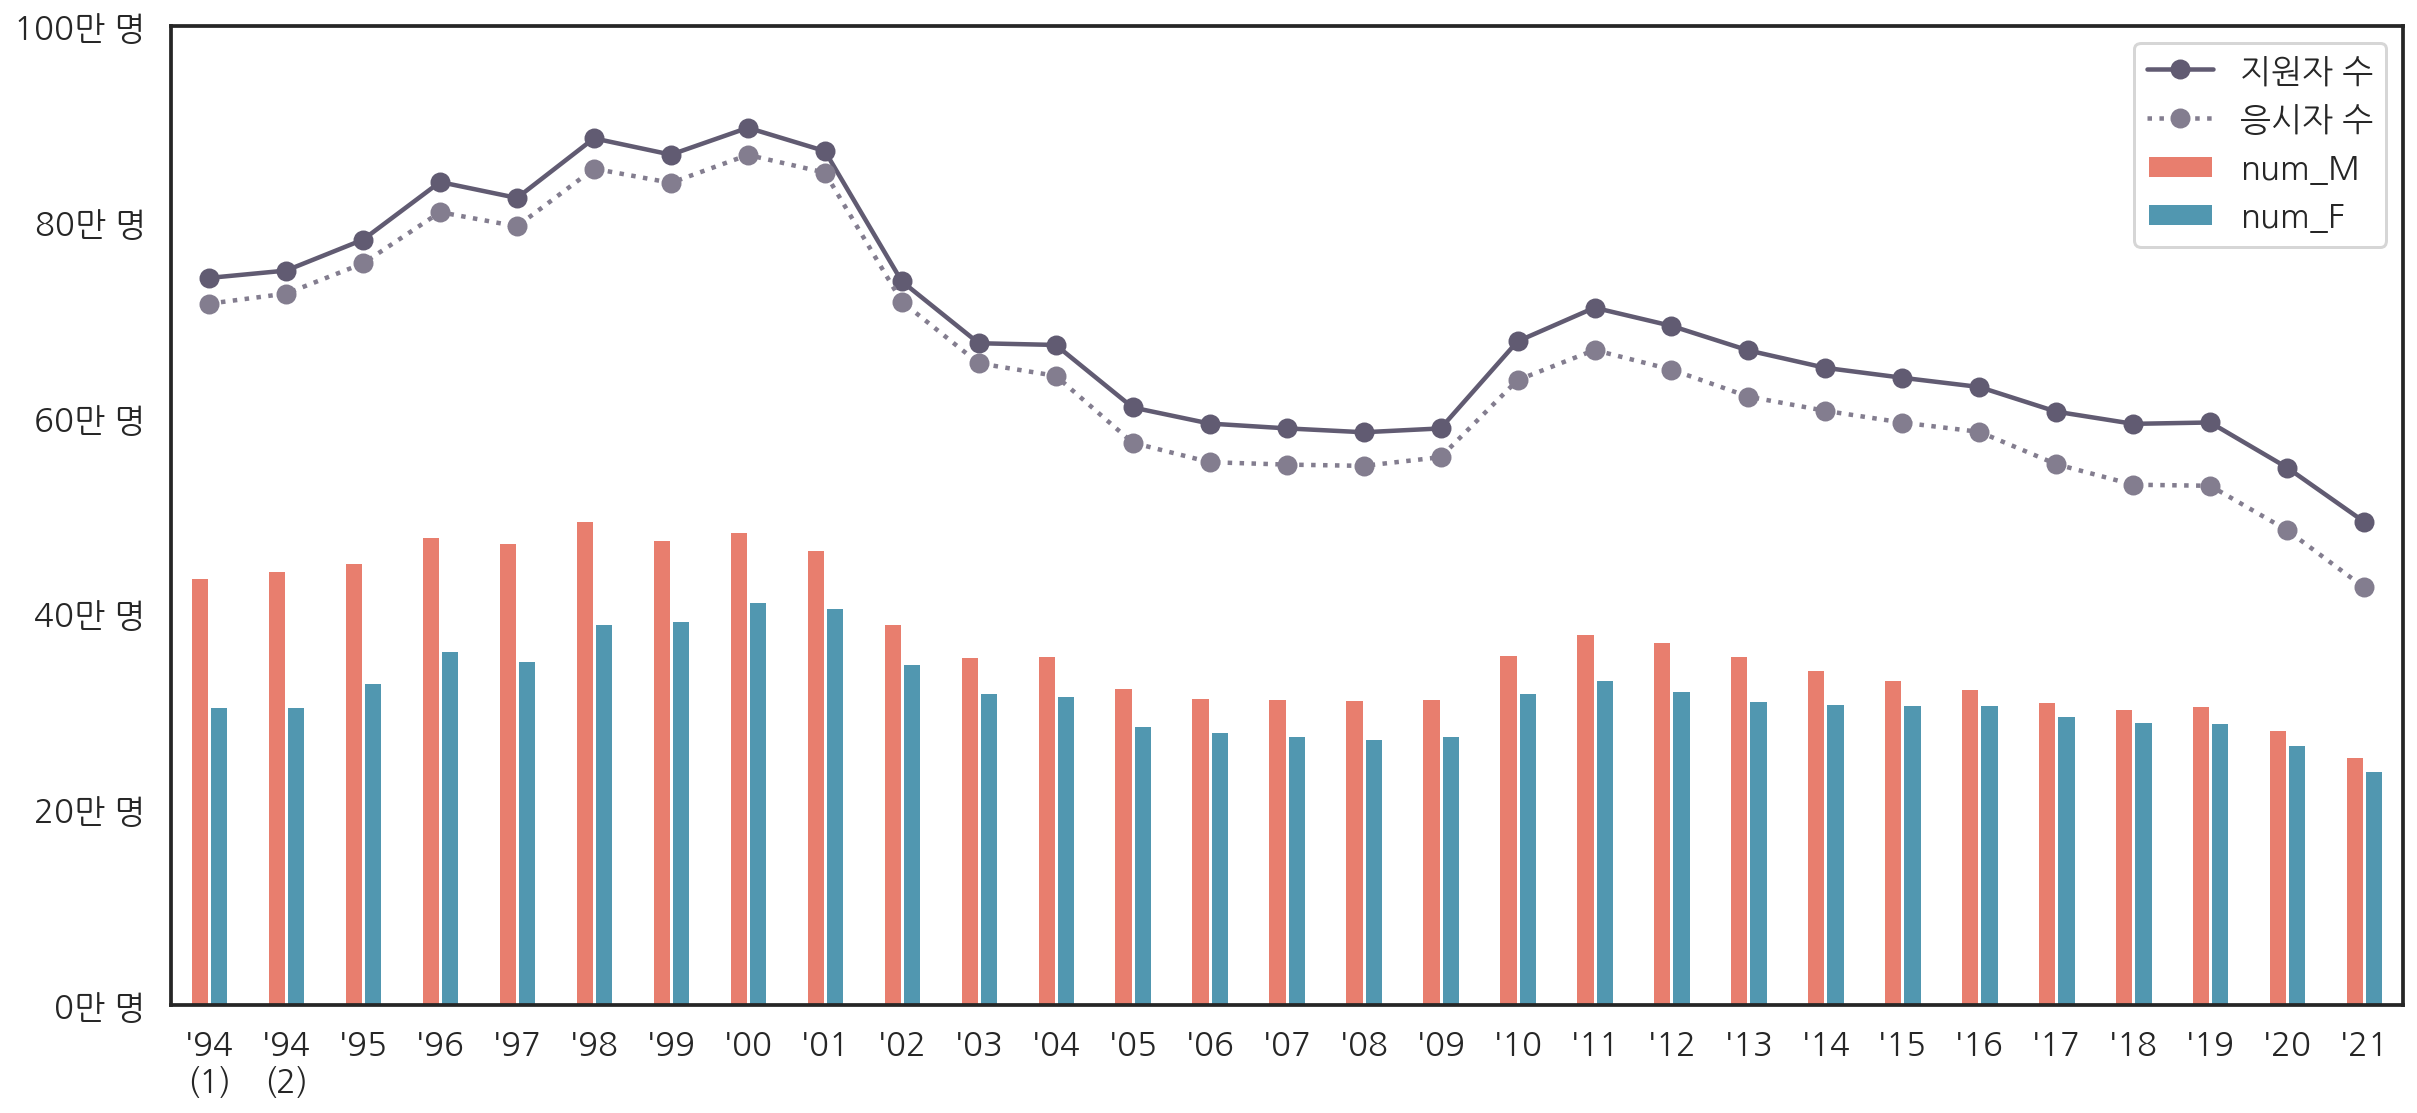

In [36]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

# xticklabels 수정
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

# xlabels 제거
ax.set_xlabel("")

ax.legend()